In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("/Volumes/Macbook/we_data/train.csv") 
#test = pd.read_csv("/Volumes/Macbook/we_data/test.csv") 
validation = pd.read_csv("/Volumes/Macbook/we_data/validation.csv") 

In [3]:
#train.head()

In [4]:
#validation.head()

In [5]:
#need to find the lost three column
#test.head()

In [6]:
#train.info()

In [7]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

## Feature engineering

### Split the OS and the browser

In [3]:
def split_data_os(data):
    return data.split('_')[0]
def split_data_browser(data):
    return data.split('_')[1]
def create_os_browser(data):
    os = data['useragent'].apply(split_data_os)
    browser = data['useragent'].apply(split_data_browser)
    os=np.array(os)
    browser = np.array(browser)
    df_os = pd.DataFrame(columns=['OS'], data = os)
    df_browser = pd.DataFrame(columns=['Browser'], data = browser)
    data.insert(0,'OS',df_os)
    data.insert(1,'Browser',df_browser)

In [4]:
create_os_browser(train)
train.head()

,OS,Browser,click,weekday,hour,bidid,userid,useragent,IP,region,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,windows,ie,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,windows,chrome,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,windows,ie,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,windows,ie,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,windows,ie,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [5]:
create_os_browser(validation)
validation.head()

,OS,Browser,click,weekday,hour,bidid,userid,useragent,IP,region,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,windows,ie,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,windows,chrome,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,windows,ie,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,windows,chrome,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,windows,chrome,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


### Look at the unique value for each features

In [6]:
def get_unique(data):
    cols = data.columns
    col_unique = {}
    for col in cols:
        unique = data[col].unique()
        col_unique[col]=unique
        print(col,":")
        print(unique)
        print()
    return col_unique

In [7]:
col_unique = get_unique(train)

OS :
['windows' 'mac' 'android' 'linux' 'ios' 'other']

Browser :
['ie' 'chrome' 'other' 'safari' 'maxthon' 'firefox' 'opera' 'theworld'
 'sogou']

click :
[0 1]

weekday :
[5 1 3 6 4 2 0]

hour :
[22 20 13 23  6 17 12 16 14  0 18 21  2  1 19 10 11 15  8  5  9  3  4  7]

bidid :
['b7bea80521fdecd95d2d761a38c91c3f09618066'
 '4f51205475678f5a124bc76b2c54163bf8eaa7eb'
 'b604e3fd054a658ab7ced4285ebf2ef54d2bd890' ...
 '2a9d622f70b8c61c418c97fbab18a4c088c7768a'
 '3f90fdf1527c224d4b684af565668719833283f7'
 '0721d40588ea0fb9f48843e1164d818738245043']

userid :
['2e880fb7d690cf7377b2e42e701728e3f3c0e4c1'
 '3a1fe01360ff8100e7d006b83b77a3e4c01d928c'
 '801d18a056b6fe6b06a794aef17fb0d6daff2414' ...
 'bd2bbb9b1cc25ec32a82e58eb8bab12dfdbf5b34'
 '502b1ccf0dbc6e228f8ef2427b16d5c7cc9d937c'
 'fa8971421a2797bd0345d7dbb8cca0be01cd40ae']

useragent :
['windows_ie' 'windows_chrome' 'mac_other' 'windows_other'
 'android_safari' 'mac_safari' 'windows_maxthon' 'windows_firefox'
 'mac_chrome' 'linux_firefox' 'wi

advertiser :
[3427 2821 1458 2259 3386 3358 3476 2261 2997]

usertag :
['null' '10052,10006,13866,10110' '13866,10063,10111' ...
 '10063,10006,10076,10083,10059,10075,10110'
 '10048,13496,14273,10083,13776,10111,13403,10063,10133,10116,10057,10059,10079,10076,10077,10093,10075,10074,10102,10024,10006,10148,16706,10052,10127,11680'
 '10024,13403,10074,13800,10063,10006,10110']



### Problem 3: Linear Bidding Strategy

In [8]:
# old cols
cols = ['weekday','hour','region','advertiser','OS','Browser','adexchange']

In [9]:
#cols = ['weekday','hour','region', 'city', 'advertiser','OS','Browser','adexchange']

In [10]:
cols_len = {}
for col in cols:
    temp = col_unique[col]
    cols_len[col] = len(temp)

In [11]:
cols_len

{'Browser': 9,
 'OS': 6,
 'adexchange': 5,
 'advertiser': 9,
 'hour': 24,
 'region': 35,
 'weekday': 7}

### one-hot encoder

In [12]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [13]:
for col in cols:
    print(col_unique[col])

[5 1 3 6 4 2 0]
[22 20 13 23  6 17 12 16 14  0 18 21  2  1 19 10 11 15  8  5  9  3  4  7]
[  2 238  40   1 216 276  80  15 333 308 298  55  79 374  27  94 183 164
 134 344   0 146 106   3 394 124 201 275  65 393 253 368 359 325 395]
[3427 2821 1458 2259 3386 3358 3476 2261 2997]
['windows' 'mac' 'android' 'linux' 'ios' 'other']
['ie' 'chrome' 'other' 'safari' 'maxthon' 'firefox' 'opera' 'theworld'
 'sogou']
['2' '1' '3' '4' 'null']


In [14]:
def one_hot_encoder(data):
    values = array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0,:])])
    return onehot_encoded 

In [15]:
def create_one_hot_feature(data,name,dataframe):
    for i in range(len(data[0,:])):
        temp = data[:,i]
        df_temp = pd.DataFrame(columns=[name+str(i)], data = temp)
        dataframe.insert(0,name+str(i),df_temp)

In [16]:
def add_onehot_into_dataset(data,cols):
    for col in cols:
        onehot = one_hot_encoder(data[col])
        create_one_hot_feature(onehot,col,data)

In [17]:
add_onehot_into_dataset(train,cols)

/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "catego

In [18]:
train.head()

,adexchange4,adexchange3,adexchange2,adexchange1,adexchange0,Browser8,Browser7,Browser6,Browser5,Browser4,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [19]:
train.columns

Index(['adexchange4', 'adexchange3', 'adexchange2', 'adexchange1',
       'adexchange0', 'Browser8', 'Browser7', 'Browser6', 'Browser5',
       'Browser4',
       ...
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object', length=122)

In [21]:
train.to_csv('new_train.csv',index=True,header=True)  #index=False,header=False表示不保存行索引和列标题

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430981 entries, 0 to 2430980
Columns: 122 entries, adexchange4 to usertag
dtypes: float64(95), int64(11), object(16)
memory usage: 2.2+ GB


### Calculate base_bid ( constant ) with average training dataset

In [44]:
def get_base_bid(data):
    payprice = data['payprice'].values
    return np.mean(payprice)

In [45]:
base_bid = get_base_bid(train)
base_bid

78.15141623895867

### Caculate avgCTR

In [46]:
def get_avgCTR(data):
    clicks = data['click'].values
    return np.mean(clicks)

In [47]:
avgCTR = get_avgCTR(train)
avgCTR

0.0007375623256619447

### Calculate pCTR for testing dataset with logistic regression model

In [48]:
#old
not_contains = ['weekday','hour','region','slotvisibility','slotformat','advertiser','OS','Browser','adexchange','bidid','userid','useragent','IP','city','domain','url','urlid','slotid','creative','bidprice','payprice','keypage','usertag']

In [23]:
not_contains = ['weekday','hour','region','slotvisibility','slotformat','advertiser','OS','Browser','adexchange','bidid','userid','useragent','IP','city','domain','url','urlid','slotid','creative','bidprice','payprice','keypage','usertag']

In [49]:
len(not_contains)

23

In [50]:
# append all the related feature
def get_x_features(data):
    columns_train = data.columns
    columns_train_values = np.array(columns_train)
    train_cols = []
    for col in columns_train_values:
        if col not in not_contains:
            train_cols.append(col)
    return train_cols

In [51]:
train_cols = get_x_features(train)
len(train_cols)

99

In [34]:
print(train_cols)

['adexchange4', 'adexchange3', 'adexchange2', 'adexchange1', 'adexchange0', 'Browser8', 'Browser7', 'Browser6', 'Browser5', 'Browser4', 'Browser3', 'Browser2', 'Browser1', 'Browser0', 'OS5', 'OS4', 'OS3', 'OS2', 'OS1', 'OS0', 'advertiser8', 'advertiser7', 'advertiser6', 'advertiser5', 'advertiser4', 'advertiser3', 'advertiser2', 'advertiser1', 'advertiser0', 'region34', 'region33', 'region32', 'region31', 'region30', 'region29', 'region28', 'region27', 'region26', 'region25', 'region24', 'region23', 'region22', 'region21', 'region20', 'region19', 'region18', 'region17', 'region16', 'region15', 'region14', 'region13', 'region12', 'region11', 'region10', 'region9', 'region8', 'region7', 'region6', 'region5', 'region4', 'region3', 'region2', 'region1', 'region0', 'hour23', 'hour22', 'hour21', 'hour20', 'hour19', 'hour18', 'hour17', 'hour16', 'hour15', 'hour14', 'hour13', 'hour12', 'hour11', 'hour10', 'hour9', 'hour8', 'hour7', 'hour6', 'hour5', 'hour4', 'hour3', 'hour2', 'hour1', 'hour0',

In [ ]:
click_1=train[(train.click==1)]
click_0=train[(train.click==0)]

In [ ]:
from sklearn.utils import resample
trainData = resample(click_0, replace=False, n_samples=2429188, random_state=500)
trainData.head()

In [55]:
trainData = train.loc[:,train_cols]
trainData.head()

,adexchange4,adexchange3,adexchange2,adexchange1,adexchange0,Browser8,Browser7,Browser6,Browser5,Browser4,...,weekday5,weekday4,weekday3,weekday2,weekday1,weekday0,click,slotwidth,slotheight,slotprice
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,200,200,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,300,250,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,250,250,5
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,160,600,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,728,90,133


## Training Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [57]:
train_x = trainData.drop('click', axis=1)
train_y = trainData['click']
len(train_x.columns)

98

In [43]:
train_x.columns
#train_x.info()

Index(['adexchange4', 'adexchange3', 'adexchange2', 'adexchange1',
       'adexchange0', 'Browser8', 'Browser7', 'Browser6', 'Browser5',
       'Browser4',
       ...
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object', length=121)

In [58]:
x = train_x.values
y = train_y.values

### Model 1: Logistic Regression

In [96]:
#Do we need to change the C value?
logistic_model = LogisticRegression(C=1000.0, 
                                    #class_weight='balanced', 
                                    random_state=0)
logistic_model.fit(x, y)
#print("Training End")

/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

### Model 2: XGBoost

In [59]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor 

In [60]:
#using the gradient search to find the best parameter of XGBoost

xclas = XGBClassifier(ooster='gbtree',learning_rate = 0.1,
 n_estimators=75,# best=50
 max_depth=9,
 min_child_weight=9,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.85,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1, seed=27,n_jobs=4) 
xclas.fit(x, y)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=9, missing=None, n_estimators=75,
       n_jobs=4, nthread=4, objective='binary:logistic', ooster='gbtree',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)

### Model 3: Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
GBoosting = GradientBoostingClassifier()
GBoosting.fit(x, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Random Forest

In [42]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators=100, oob_score=True, 
#                              n_jobs=2, 
#                              random_state=0)
# clf.fit(x, y)
# print("Training End")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

### SVM (would spend lot of time)

In [ ]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(x,y)
# #print('Training End')

/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Preprocessing the validation dataset

In [61]:
add_onehot_into_dataset(validation,cols)
validation.head()

/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "catego

,adexchange4,adexchange3,adexchange2,adexchange1,adexchange0,Browser8,Browser7,Browser6,Browser5,Browser4,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [23]:
validation.to_csv('new_validation.csv',index=False,header=True)  #index=False,header=False表示不保存行索引和列标题

In [62]:
testData_validation = validation.loc[:,train_cols]
testData_validation.head()

,adexchange4,adexchange3,adexchange2,adexchange1,adexchange0,Browser8,Browser7,Browser6,Browser5,Browser4,...,weekday5,weekday4,weekday3,weekday2,weekday1,weekday0,click,slotwidth,slotheight,slotprice
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,160,600,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,950,90,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,300,250,5
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,336,280,5
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,200,200,5


In [63]:
test_x_validation = testData_validation.drop('click',1)
test_x_validation.columns
test_x_validation = test_x_validation.values

In [64]:
test_y_validation = testData_validation['click']
test_y_validation = test_y_validation.values

In [97]:
pCTR = logistic_model.predict_proba(test_x_validation)[:,1]
pCTR

array([0.00048742, 0.00041479, 0.00031849, ..., 0.00038419, 0.00035792,
       0.0003345 ])

In [65]:
pCTR2 = xclas.predict_proba(test_x_validation)[:,1] 
pCTR2

array([0.00076157, 0.00057663, 0.00077429, ..., 0.00087497, 0.00090206,
       0.00072079], dtype=float32)

In [38]:
list_sqr=[pCTR]
output_Dataframe=pd.DataFrame(data=list_sqr).T
output_Dataframe.to_csv('new column pCTR_lr.csv',encoding='utf-8')

In [41]:
pCTR3 = GBoosting.predict_proba(test_x_validation)[:,1] 
pCTR3

array([0.00052486, 0.00039804, 0.00052143, ..., 0.00056075, 0.00052951,
       0.00047753])

In [49]:
# chy thinks useless
# bid_price = base_bid * pCTR / avgCTR
# bid_price

array([51.70340895, 43.9736857 , 33.66025971, ..., 40.68398207,
       37.98036395, 35.47217727])

### Model accuracy

### Mathod 1

In [67]:
from sklearn.metrics import roc_auc_score

In [48]:
#score for logistic regression
roc_auc_score(test_y_validation, pCTR)

0.6676156244243264

In [68]:
#score for xgboost
roc_auc_score(test_y_validation, pCTR2)

0.7375223395157839

In [53]:
#socre for GradientBoosting
roc_auc_score(test_y_validation, pCTR3)

0.7322783905201792

### Mathod 2

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
y_pre = logistic_model.predict(test_x_validation)
y_pre2 = xclas.predict(test_x_validation)
y_pre3 = GBoosting.predict(test_x_validation)

### Logistic regression

In [56]:
mean_squared_error(test_y_validation, y_pre)

0.0006646376573167722

### XGBoost

In [57]:
mean_squared_error(test_y_validation, y_pre2)

0.0006646376573167722

### GradientBoosting

In [58]:
mean_squared_error(test_y_validation, y_pre3)

0.0006712182281812947

### Accuracy

In [52]:
# y_pre = logistic_model.predict(test_x_validation)
# accuracy = sum(test_y_validation == y_pre)
# print(accuracy/len(test_y_validation))

0.9993353623426833


In [53]:
# y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
# from sklearn.metrics import classification_report, confusion_matrix
# print(classification_report(test_y_validation,y_pre))
# print(confusion_matrix(test_y_validation, y_pre))

/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    303723
           1       0.00      0.00      0.00       202

   micro avg       1.00      1.00      1.00    303925
   macro avg       0.50      0.50      0.50    303925
weighted avg       1.00      1.00      1.00    303925

[[303723      0]
 [   202      0]]


## Graph for Question 3

## linear

### Click

In [69]:
csv_data=pd.read_csv("/Volumes/Macbook/we_data/validation.csv")
csv_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [70]:
def output_bidprice_lr(base_bid):
    return base_bid*pCTR/avgCTR
def output_bidprice_xgb(base_bid):
    return base_bid*pCTR2/avgCTR
def output_bidprice_gb(base_bid):
    return base_bid*pCTR3/avgCTR   

### Logistic regression

In [51]:
click_total_lr=[]
bid_price_list_lr=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_lr(base_bid))]
    bid_price_list_lr.append(output_bidprice_lr(base_bid))
    click_total_individual_lr=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_lr.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_lr)
    click_total_lr.append(click_total_individual_mean)
    print(click_total_lr[-1])

53.0
54.5
52.6
52.3
52.4
52.6
55.0
52.9
53.9
54.2
52.7
54.6
51.8
54.4
52.9
51.4
53.7
51.8
54.0
54.4
50.2
50.8
51.3
54.8
55.4
54.3
56.9
54.7


KeyboardInterrupt: 

### XGBoost

In [71]:
click_total_xgb=[]
bid_price_list_xgb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb(base_bid))]
    bid_price_list_xgb.append(output_bidprice_xgb(base_bid))
    click_total_individual_xgb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_xgb.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_xgb)
    click_total_xgb.append(click_total_individual_mean)
    print(click_total_xgb[-1])

4.0
4.0
6.0
7.0
8.0
9.0
12.0
13.0
17.0
17.0
23.0
25.0
31.0
37.0
41.0
42.0
45.0
49.0
49.0
49.0
50.0
51.0
52.0
54.0
58.0
62.0
64.0
67.0
70.0
72.0
75.9
77.0
79.0
81.0
84.0
87.0
91.0
93.0
96.0
98.0
100.0
102.0
104.0
107.0
107.0
109.0
111.0
112.0
113.0
115.0
115.0
117.0
118.0
119.0
122.0
125.9
123.7
120.8
120.4
119.8
116.7
112.2
109.9
106.5
103.9
104.2
103.4
100.0


KeyboardInterrupt: 

### GradientBoosting

In [80]:
click_total_gb=[]
bid_price_list_gb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_gb(base_bid))]
    bid_price_list_gb.append(output_bidprice_gb(base_bid))
    click_total_individual_gb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_gb.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_gb)
    click_total_gb.append(click_total_individual_mean)
    print(click_total_gb[-1])

4.0
4.0
5.0
5.0
9.0
10.0
11.0
12.0
12.9
14.0
19.0
22.0
25.0
27.0
28.0
31.0
34.0
36.0
37.0
39.0
43.0
45.0
48.0
49.0
50.0
53.0
55.0
56.0
56.0
58.0
59.0
59.0
59.0
60.0
61.0
63.0
64.0
67.0
69.0
69.0
71.0
76.0
76.0
79.0
81.0
85.0
89.0
91.0
94.0
95.0
97.0
99.0
99.0
100.0
101.0
101.0
103.0
103.0
103.0
102.9
105.0
105.0
105.0
107.0
108.0
109.0
111.0
112.0
114.0
115.0
118.0
119.0
120.0
120.0
121.0
123.0
125.0
125.3
124.0
122.3
121.1
119.5
117.3
116.2
115.3
114.5
111.5
108.2
110.0
109.2
107.5
107.1
102.3
99.6
99.6
96.1
100.2
97.5
97.2
94.3
95.2
95.3
94.3
91.1
94.3
93.8
91.0
94.7
89.9
89.8
86.1
88.2
87.8
88.0
86.4
89.5
83.3
84.9
88.4
84.9
82.3
85.5
83.4
82.2
84.6
79.0
82.8
81.0
77.7
80.6
78.8
80.2
83.4
76.9
78.9
78.7
78.5
78.3
78.4
75.9
73.8
72.2
74.8
76.3
74.0
74.9
78.8
77.4
74.5
74.8
71.2
74.6
76.6
73.6
70.2
72.9
73.5
73.5
77.2
75.1
72.3
71.7
75.2
74.9
73.8
73.9
69.3
76.7
72.8
72.8
69.2
72.9
72.9
73.1
71.4
70.4
67.8
69.0
67.5
70.0
69.2
66.0
66.6
70.8
71.9
71.1
69.8
68.3
67.4
67.0
67.3
66.7
68.2

### Table for Question 3

### Logistic regression

In [62]:
click_total_lr.index(max(click_total_lr)) #the optimal base bid

81

In [65]:
bid_price_list_lr_optimal=bid_price_list_lr[click_total_lr.index(max(click_total_lr))] #the optimal bid price

array([54.24250566, 46.18661879, 35.34887199, ..., 42.69698893,
       39.90355055, 37.251563  ])

In [68]:
#click
click_total_lr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_lr_optimal)]
click_total_individual_lr_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_lr_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_lr_optimal)
click_total_lr_optimal.append(click_total_individual_mean)
print(click_total_lr_optimal[-1])

109.7


In [70]:
#ctr
ctr_total_lr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_lr_optimal)]
ctr_total_individual_lr_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_lr_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_lr_optimal)
ctr_total_lr_optimal.append(ctr_total_individual_mean)
print(ctr_total_lr_optimal[-1])

0.0007548074641806462


In [74]:
#cpc
cpc_total_lr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_lr_optimal)]
spend_total_individual_lr_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_lr_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_lr_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_lr_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_lr_optimal[-1])

57.339075229357796


In [77]:
#cpm
cpm_total_lr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_lr_optimal)]
spend_total_individual_lr_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_lr_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_lr_optimal)
        
cpm_total_lr_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_lr_optimal[-1])

42.985987138484816


### XGBoost

In [81]:
click_total_xgb.index(max(click_total_xgb)) #the optimal base bid

55

In [82]:
bid_price_list_xgb_optimal=bid_price_list_xgb[click_total_xgb.index(max(click_total_xgb))] #the optimal bid price

In [83]:
#click
click_total_xgb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_optimal)]
click_total_individual_xgb_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_xgb_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_xgb_optimal)
click_total_xgb_optimal.append(click_total_individual_mean)
print(click_total_xgb_optimal[-1])

126.0


In [84]:
#ctr
ctr_total_xgb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_optimal)]
ctr_total_individual_xgb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_xgb_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_xgb_optimal)
ctr_total_xgb_optimal.append(ctr_total_individual_mean)
print(ctr_total_xgb_optimal[-1])

0.0008287159257056645


In [85]:
#cpc
cpc_total_xgb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_optimal)]
spend_total_individual_xgb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_xgb_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_xgb_optimal[-1])

48.827959375


In [86]:
#cpm
cpm_total_xgb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_optimal)]
spend_total_individual_xgb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_optimal)
        
cpm_total_xgb_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_xgb_optimal[-1])

40.98298645263669


### GradientBoosting

In [87]:
click_total_gb.index(max(click_total_gb)) #the optimal base bid

77

In [88]:
bid_price_list_gb_optimal=bid_price_list_gb[click_total_gb.index(max(click_total_gb))] #the optimal bid price

In [89]:
#click
click_total_gb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_gb_optimal)]
click_total_individual_gb_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_gb_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_gb_optimal)
click_total_gb_optimal.append(click_total_individual_mean)
print(click_total_gb_optimal[-1])

125.5


In [90]:
#ctr
ctr_total_gb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_gb_optimal)]
ctr_total_individual_gb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_gb_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_gb_optimal)
ctr_total_gb_optimal.append(ctr_total_individual_mean)
print(ctr_total_gb_optimal[-1])

0.0008370749643377845


In [91]:
#cpc
cpc_total_gb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_gb_optimal)]
spend_total_individual_gb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_gb_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_gb_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_gb_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_gb_optimal[-1])

49.60294761904762


In [92]:
#cpm
cpm_total_gb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_gb_optimal)]
spend_total_individual_gb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_gb_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_gb_optimal)
        
cpm_total_gb_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_gb_optimal[-1])

41.59400642881386


### XGBoost

In [ ]:
click_total_xgb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb(base_bid))]
    click_total_individual_xgb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_xgb.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_xgb)
    click_total_xgb.append(click_total_individual_mean)
    print(click_total_xgb[-1])

### GradientBoosting

In [ ]:
click_total_gb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_gb(base_bid))]
    click_total_individual_gb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_gb.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_gb)
    click_total_gb.append(click_total_individual_mean)
    print(click_total_gb[-1])

### Click Figure for three models

NameError: name 'click_total_xgb' is not defined

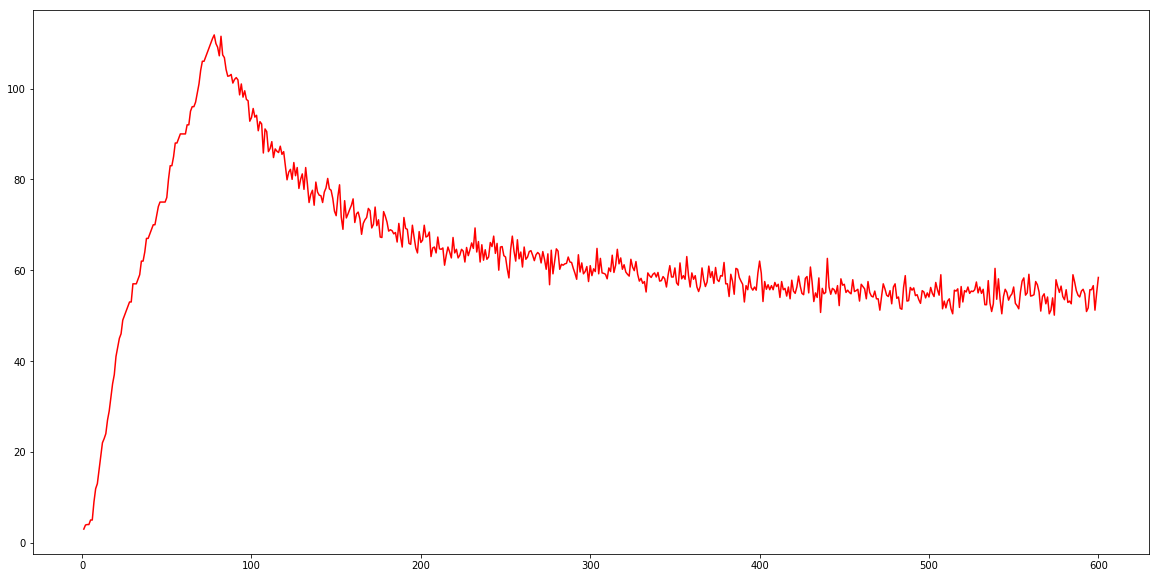

In [75]:
plt.figure(figsize = (20,10))

plt.plot(range(1,601),click_total_lr, label='Logistic Regression', color='r')
plt.plot(range(1,601),click_total_xgb, label='XGBoost', color='b')
plt.plot(range(1,601),click_total_gb, label='GradientBoosting', color='g')
plt.xlabel('Base Bid')
plt.ylabel('Clicks')
plt.title('Linear Strategy Click Result')
plt.legend()
plt.savefig('Linear Strategy Click Result.jpg')

### CTR

### Logistic regreesion

In [48]:
ctr_total_lr=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_lr(base_bid))]
    ctr_total_individual_lr=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
        data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
        ctr_total_individual_lr.append(data_finally_filtered_ctr)
        ctr_total_individual_mean=np.mean(ctr_total_individual_lr)
    ctr_total_lr.append(ctr_total_individual_mean)
    print(ctr_total_lr[-1])

0.007159904534606206
0.0025268477574226155
0.001728608470181504
0.0012338062924120913
0.0011030222810500773
0.0007818608287724785
0.0010648367250354945
0.0011396011396011397
0.0010352791271800586
0.0011054304269725022
0.0011598095470638505
0.0012077294685990338
0.0011395164486722156
0.0010811784845481576
0.0011170872983036824
0.0011050986967456751
0.00112799182205929
0.0011498406649364302
0.0011353524195280614
0.0011819308714578105
0.0011681290918475456
0.0011561881760489196
0.001123540618435836
0.0011412866259840687
0.0011126440874093192
0.0010869333560665803
0.0010637644989055501
0.0010443967131061934
0.0010077769960639654
0.0010481794777491727
0.0010155178250102442
0.0009854601407306236
0.0009730400791853305
0.0009606617168164648
0.0009835961544563253
0.0009571298454698427
0.0009623191892460832
0.0009822606655915556
0.0009565279463202226
0.0009458369265863632
0.0009362279511533243
0.0009267104427028173
0.0009052699644358229
0.000908265213442325
0.0009112627145777405
0.00090203860725

0.0006951527741585611
0.0007019354206972762
0.0006882034549487686
0.0006623325893222659
0.0006506128902391256
0.0006689773091857054
0.0006993992798712988
0.0006738944524108373
0.0006621641632520885
0.000674312704970388
0.0006312231102564006
0.0006484783202678396
0.0006910591511824357
0.0007136199624144387
0.0006384237707040109
0.0006459843617413242
0.0006668722156398447
0.0006303251974330754
0.0006737862493403953
0.0006269276497794879
0.0006592383009809889
0.0006498159277341282
0.0006598477094593258
0.000736575719531213
0.0006490981797677958
0.0006236088651083721
0.0006453702248351541
0.000690784771921954
0.0006787084628678529
0.0006162859848425602
0.0006617114513327361
0.0006473572888829753
0.0006530561107601674
0.000672534320241048
0.0006809494015280885
0.0006699758985123978
0.0006914493981394498
0.0006830986849936211
0.0006408140382975944
0.000697930651398525
0.0006673558240392706
0.000696449943225107
0.0006607704252769777
0.000735810884583024
0.0006984821626846617
0.000701033510443

### XGBoost

In [49]:
ctr_total_xgb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb(base_bid))]
    ctr_total_individual_xgb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
        data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
        ctr_total_individual_xgb.append(data_finally_filtered_ctr)
        ctr_total_individual_mean=np.mean(ctr_total_individual_xgb)
    ctr_total_xgb.append(ctr_total_individual_mean)
    print(ctr_total_xgb[-1])

0.007017543859649122
0.0021459227467811163
0.0020422055820285907
0.001571621014818141
0.0009995002498750624
0.00079155672823219
0.0008640552995391706
0.0007944753407076943
0.0009133401386127975
0.0008199488737761059
0.0009997391984699643
0.0009888458191598768
0.0011261261261261263
0.0012415690748632596
0.0012687999009717151
0.001198288159771755
0.0011918319781762323
0.0012173308158600815
0.0011489132218809352
0.0010880667939778834
0.001049317943336831
0.0010078254683424238
0.0009673338790088549
0.0009420138162026375
0.0009462127020898251
0.0009523370658802205
0.0009240409465644447
0.0009160013124794926
0.0009103677885865891
0.0008859139679102274
0.0008928676323735008
0.0008720568082720818
0.0008656680436997995
0.0008586511756100664
0.0008574928542262148
0.0008617615594912635
0.0008731278124790113
0.0008672218129598374
0.0008700853771276306
0.0008657014390078002
0.0008649172274213357
0.0008632143733656051
0.0008625909245481764
0.0008714845372580002
0.0008534464881075822
0.00085268831504

0.0006265310631593164
0.000630474044557108
0.0006880494841607398
0.0006486047548153556
0.0006655883287659487
0.0006357682413527732
0.0006525967032911166
0.0006426683585816595
0.0006710583139991602
0.0006772980821036262
0.0006610415376825437
0.0006403900249227457
0.0006287188798465023
0.0006596936650562719
0.0006519878211032361
0.0006406910176421645
0.0006576240714580226
0.0006297924123203341
0.000674182603634812
0.0006913622300615749
0.0006397039982046571
0.0006515862817911574
0.0006695559984200487
0.0006813281249409065
0.0006068243823365079
0.0006702968026212356
0.0006523786545963655
0.0006565289175172769
0.0006328234249478465
0.0006764637194938799
0.0006801086209048535
0.0006655628825592092
0.0006850059794507585
0.0006468748207226545
0.0006746818593816155
0.0006956714650083928
0.0006812192093303551
0.0006654788203590322
0.0006667281544467634
0.0006542148630888121
0.0006582062729797102
0.0006478566079603322
0.0006771642302761473
0.0006497829487011875
0.0006490367154781539
0.0006974612

### GradientBoosting

In [50]:
ctr_total_gb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_gb(base_bid))]
    ctr_total_individual_gb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
        data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
        ctr_total_individual_gb.append(data_finally_filtered_ctr)
        ctr_total_individual_mean=np.mean(ctr_total_individual_gb)
    ctr_total_gb.append(ctr_total_individual_mean)
    print(ctr_total_gb[-1])

0.008849557522123894
0.002409638554216868
0.0019786307874950534
0.0015202189115232595
0.0022211253701875616
0.0018335166850018338
0.0013848671786478657
0.0012140833670578712
0.0010803623369068393
0.001018181818181818
0.001231686762608583
0.00131257084899469
0.0013502565487442614
0.0013345195729537365
0.001284580446850484
0.0013273957352059604
0.0013668891211707002
0.0013686131386861315
0.001324408490532269
0.0013126009693053312
0.001356638061585058
0.0013514325184695777
0.0013866820742452694
0.001360846502069042
0.0013335111348179757
0.0013574428849503126
0.0013558152147118275
0.0013302294645826404
0.0012856126173695448
0.0012834129934501683
0.001247673828455422
0.0012122706445581377
0.0011640524810101608
0.0011359118532401887
0.0010806214459069248
0.0010603026069979974
0.0010316424069506907
0.0010166765299464348
0.0010126210742588788
0.0009838028972282422
0.0009731092897672761
0.000993892790354009
0.0009639776763064433
0.0009641553876758973
0.0009581603321622484
0.0009725845576456588


0.0006760868271807688
0.0006291075115214078
0.0006723441682407632
0.0006324337342758066
0.0006557551207585203
0.0006775350865591119
0.0006520446630669806
0.0006849091762418313
0.0006225333644809003
0.0006548363970232549
0.0006881080253648412
0.0006628141604224747
0.0006790514682457526
0.0006318852191269123
0.0006717484948301651
0.0006603683843632752
0.000673053008180548
0.0006854199170816493
0.0006472034927685604
0.0006888616732868966
0.0006477983745876451
0.0006814752037471365
0.0006857881268183968
0.0006837033853273535
0.0006861197159645438
0.0006556433391460813
0.0006511156117744333
0.000705685679840609
0.0006446161251340662
0.0006836549010754091
0.0006641933617249087
0.0006823107176055597
0.0006426840387629952
0.0006963409871712843
0.0006851452133501663
0.0006499547521614582
0.000668666124536497
0.0006130598801952609
0.000674794587589264
0.00067319203816881
0.000689601250695755
0.0006717951273533211
0.000672896105433743
0.0006813741352866315
0.00066207941708405
0.000661884537971626

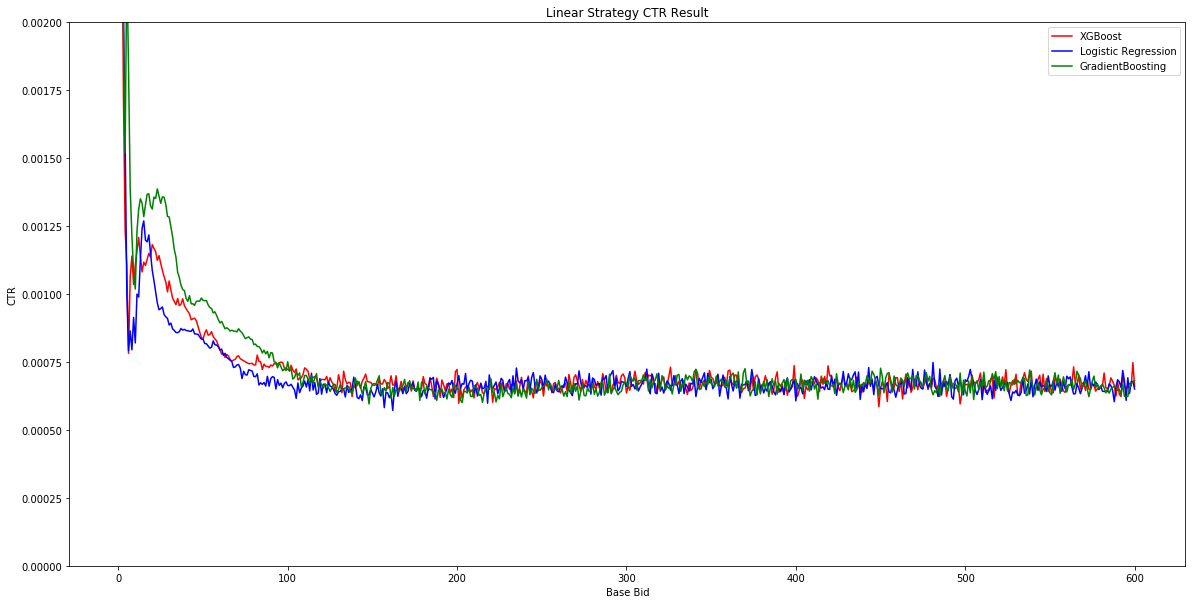

In [74]:
plt.figure(figsize = (20,10))

plt.plot(range(1,601),ctr_total_lr, label='XGBoost', color='r')
plt.plot(range(1,601),ctr_total_xgb, label='Logistic Regression', color='b')
plt.plot(range(1,601),ctr_total_gb, label='GradientBoosting', color='g')
plt.xlabel('Base Bid')
plt.ylabel('CTR')
plt.ylim(0,0.002)
plt.title('Linear Strategy CTR Result')
plt.legend()
plt.savefig('Linear Strategy CTR Result.jpg')

### Graph for Question 4

In [72]:
#non linear 1: square
def output_bidprice_lr_nl_sqr(base_bid):
    return base_bid*(pCTR/avgCTR)**2
def output_bidprice_xgb_nl_sqr(base_bid):
    return base_bid*(pCTR2/avgCTR)**2
def output_bidprice_gb_nl_sqr(base_bid):
    return base_bid*(pCTR3/avgCTR)**2    

In [58]:
#non linear 2: exponetional
#need to debug?
def output_bidprice_lr_nl_exp(base_bid):
    return base_bid*np.exp(pCTR/avgCTR)
def output_bidprice_xgb_nl_exp(base_bid):
    return base_bid*np.exp(pCTR2/avgCTR)
def output_bidprice_gb_nl_exp(base_bid):
    return base_bid*np.exp(pCTR3/avgCTR)    

In [59]:
#non linear 3: modified ORTB
def output_bidprice_lr_nl_ortb(base_bid):
    return np.sqrt(base_bid*(pCTR/avgCTR)+base_bid**2)
def output_bidprice_xgb_nl_ortb(base_bid):
    return np.sqrt(base_bid*(pCTR2/avgCTR)+base_bid**2)
def output_bidprice_gb_nl_ortb(base_bid):
    return np.sqrt(base_bid*(pCTR3/avgCTR)+base_bid**2)

In [44]:
#non linear 4: combined model: combine xgboost_non-linear with gb_linear
def output_bidprice_lr_nl_com(base_bid):
    return 0.5*output_bidprice_lr(base_bid)+0.5*output_bidprice_lr_nl_ortb(base_bid)
def output_bidprice_xgb_gb_nl_com(base_bid):
    return 0.5*output_bidprice_gb(base_bid)+0.5*output_bidprice_xgb_nl_sqr(base_bid)
def output_bidprice_gb_nl_com(base_bid):
    return 0.5*output_bidprice_lr(base_bid)+0.5*output_bidprice_gb_nl_ortb(base_bid)

In [73]:
click_total_xgb_nl_sqr=[]
bid_price_list_xgb_nl_sqr=[]
for base_bid in range(1,151):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_nl_sqr(base_bid))]
    bid_price_list_xgb_nl_sqr.append(output_bidprice_xgb_nl_sqr(base_bid))
    click_total_individual_xgb_nl_sqr=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_xgb_nl_sqr.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_xgb_nl_sqr)
    click_total_xgb_nl_sqr.append(click_total_individual_mean)
    print(click_total_xgb_nl_sqr[-1])

17.0
27.0
38.0
44.0
48.0
48.0
53.0
55.0
58.0
58.0
61.0
65.0
68.0
71.9
73.0
76.0
81.0
83.0
84.0
86.0
88.0
91.0
94.0
96.0
96.0
96.0
99.0
100.0
101.0
102.0
105.0
107.0
108.0
108.0
109.0
112.0
114.0
117.0
117.0
120.0
122.0
122.0
123.0
125.0
126.3
124.2
121.6
119.2
116.5
117.6
115.9
112.3
112.1
108.1


KeyboardInterrupt: 

In [88]:
# #list_sqr=[np.log(x_axis).tolist(),np.log(count).tolist()]
# test=pd.DataFrame(data=click_total_xgb_nl_sqr)
# test.to_csv('non_linear_sqr.csv',encoding='utf-8')

In [60]:
click_total_xgb_nl_exp=[]
bid_price_list_xgb_nl_exp=[]
for base_bid in range(1,151):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_nl_exp(base_bid))]
    bid_price_list_xgb_nl_exp.append(output_bidprice_xgb_nl_exp(base_bid))
    click_total_individual_xgb_nl_exp=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_xgb_nl_exp.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_xgb_nl_exp)
    click_total_xgb_nl_exp.append(click_total_individual_mean)
    print(click_total_xgb_nl_exp[-1])

46.0
51.0
52.0
55.0
60.0
66.0
71.0
72.0
84.0
91.0
94.0
95.0
99.0
104.0
109.0
111.0
111.0
114.0
120.9
116.3
112.7
109.3
104.9
99.5
95.9
94.5
89.2
88.9
85.2
81.8
82.6
80.1


KeyboardInterrupt: 

In [61]:
click_total_xgb_nl_ortb=[]
bid_price_list_xgb_nl_ortb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_nl_ortb(base_bid))]
    bid_price_list_xgb_nl_ortb.append(output_bidprice_xgb_nl_ortb(base_bid))
    click_total_individual_xgb_nl_ortb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_xgb_nl_ortb.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_xgb_nl_ortb)
    click_total_xgb_nl_ortb.append(click_total_individual_mean)
    print(click_total_xgb_nl_ortb[-1])

0.0
0.0
4.0
4.0
4.0
3.9
4.0
4.0
4.0
4.0
4.0
5.0
5.0
5.0
6.0
8.0
9.0
10.0
10.0
13.0
13.0
13.0
14.0
15.0
17.0
17.0
17.0
18.0
19.0
20.0
24.0
24.0
24.0
24.0
25.0
27.0
27.0
28.0
28.0
29.0
29.0
30.9
32.0
32.0
32.0
35.0
35.0
36.0
39.0
45.0
46.0
48.0
48.0
49.0
49.0
49.0
49.0
50.0
51.0
54.0
54.0
54.0
55.0
55.0
57.0
57.0
57.0
57.0
63.0
68.8
67.6
66.8
68.0
69.2
68.3
71.6
74.6
78.0
76.5
73.1
72.9
71.4
73.6
73.6
74.6
74.0
73.6
73.8
71.4
75.6
71.2
71.3
71.4
73.5
73.0
71.0
71.9
69.7
69.2
70.8
70.4
70.2
68.0
69.0
64.5
67.5
63.5
69.0
65.2
65.8
60.3
68.1
66.1
66.6
66.8
62.1
66.1
66.1
63.4
63.7
62.8
66.9
60.2
64.8
62.8
64.4
66.8
63.8
62.0
64.3
65.2
61.0
61.6
63.8
62.0


KeyboardInterrupt: 

In [47]:
click_total_xgb_nl_com=[]
bid_price_list_xgb_nl_com=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_gb_nl_com(base_bid))]
    bid_price_list_xgb_nl_com.append(output_bidprice_xgb_gb_nl_com(base_bid))
    click_total_individual_xgb_nl_com=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_xgb_nl_com.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_xgb_nl_com)
    click_total_xgb_nl_com.append(click_total_individual_mean)
    print(click_total_xgb_nl_com[-1])

12.0
19.0
24.0
33.0
38.0
41.0
45.0
47.0
47.0
48.0
51.0
55.0
56.0
58.0
59.0
61.0
63.0
64.0
68.0
73.0
73.0
76.0
77.0
79.0
82.0
83.0
87.0
88.0
91.0
93.0
96.0
96.0
97.0
99.0
101.0
102.0
102.0
104.0
106.0
106.0
107.0
107.0
107.0
111.0
111.0
112.0
112.0
115.0
116.0
117.0
119.0
120.0
121.0
123.0
124.0
124.0
124.7
124.3
122.1
121.0
118.5
118.6
115.1
114.9
113.6
112.4
111.4
109.4
107.9
106.3
106.3
104.0
105.2
104.7
99.6
100.7
98.5
95.1
96.4
101.4
97.9
98.1
91.9
91.8
91.8
92.3
90.1
86.2
89.4
88.9
86.0
84.5
86.8
84.6
83.0
86.8
84.0
81.6
84.8
82.5
82.2
82.8
80.7
81.4
76.5
75.3
79.7
76.3
77.2
77.8
80.0
78.0
76.3
76.9
80.0
78.9
80.8
76.4
75.9
78.7
77.8
77.9
74.5
75.3
75.7
76.4
73.7
75.4
73.0
72.8
77.6
74.1
71.7
73.3
72.0
68.8
68.7
70.9
66.2
76.0
68.9
68.3
66.8
71.0
70.9
67.9
70.4
69.6
68.1
69.1
68.7
64.5
68.4
65.9
65.3
66.6
65.9
62.5
65.2
63.1
61.6
66.2
61.5
68.9
62.7
62.6
60.9
64.8
61.5
63.8
63.0
62.9
62.6
64.3
65.2
61.5
62.5
63.8
58.9
62.0
61.0
61.6
63.0
63.2
60.7
58.1
61.5
65.7
60.8
65.7
59.3
60.

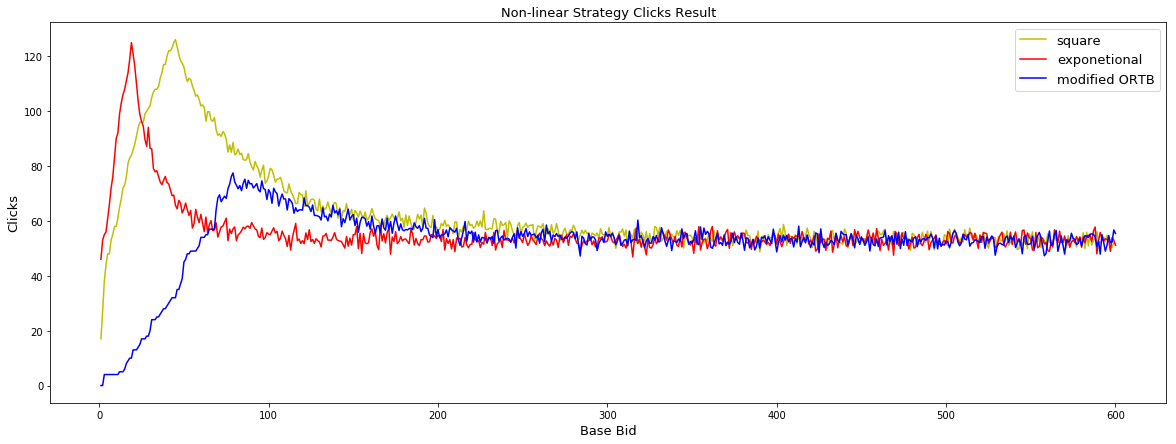

In [63]:
plt.figure(figsize = (20,7))

plt.plot(range(1,601),click_total_xgb_nl_sqr, label='square', color='y')
plt.plot(range(1,601),click_total_xgb_nl_exp, label='exponetional', color='r')
plt.plot(range(1,601),click_total_xgb_nl_ortb, label='modified ORTB', color='b')
#plt.plot(range(1,601),click_total_xgb_nl_com, label='combined model', color='g')
plt.xlabel('Base Bid',fontsize=13)
plt.ylabel('Clicks',fontsize=13)
plt.title('Non-linear Strategy Clicks Result',fontsize=13)
plt.legend(fontsize=13)
plt.savefig('Non-linear Strategy Clicks Result')

### Table for Question 4

In [52]:
print(click_total_xgb_nl_sqr.index(max(click_total_xgb_nl_sqr))) #the optimal base bid
#print(click_total_xgb_nl_exp.index(max(click_total_xgb_nl_exp))) #the optimal base bid
#print(click_total_xgb_nl_ortb.index(max(click_total_xgb_nl_ortb))) #the optimal base bid
#print(click_total_xgb_nl_com.index(max(click_total_xgb_nl_com))) #the optimal base bid

40


In [49]:
# bid_price_list_xgb_nl_sqr_optimal=bid_price_list_xgb_nl_sqr[click_total_xgb_nl_sqr.index(max(click_total_xgb_nl_sqr))] #the optimal bid price
# bid_price_list_xgb_nl_exp_optimal=bid_price_list_xgb_nl_exp[click_total_xgb_nl_exp.index(max(click_total_xgb_nl_exp))] #the optimal bid price
# bid_price_list_xgb_nl_ortb_optimal=bid_price_list_xgb_nl_ortb[click_total_xgb_nl_ortb.index(max(click_total_xgb_nl_ortb))] #the optimal bid price
bid_price_list_xgb_nl_com_optimal=bid_price_list_xgb_nl_com[click_total_xgb_nl_com.index(max(click_total_xgb_nl_com))] #the optimal bid price

# click

In [70]:
#click
click_total_xgb_nl_sqr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_sqr_optimal)]
click_total_individual_xgb_nl_sqr_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_xgb_nl_sqr_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_xgb_nl_sqr_optimal)
click_total_xgb_nl_sqr_optimal.append(click_total_individual_mean)
print(click_total_xgb_nl_sqr_optimal[-1])

126.3


In [69]:
#click
click_total_xgb_nl_exp_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_exp_optimal)]
click_total_individual_xgb_nl_exp_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_xgb_nl_exp_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_xgb_nl_exp_optimal)
click_total_xgb_nl_exp_optimal.append(click_total_individual_mean)
print(click_total_xgb_nl_exp_optimal[-1])

125.0


In [71]:
#click
click_total_xgb_nl_ortb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_ortb_optimal)]
click_total_individual_xgb_nl_ortb_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_xgb_nl_ortb_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_xgb_nl_ortb_optimal)
click_total_xgb_nl_ortb_optimal.append(click_total_individual_mean)
print(click_total_xgb_nl_ortb_optimal[-1])

78.2


In [51]:
#click
click_total_xgb_nl_com_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_com_optimal)]
click_total_individual_xgb_nl_com_optimal=[]
for interation in range(10):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    click_for_one=sum(np.array(data_finally_filtered['click']))
    click_total_individual_xgb_nl_com_optimal.append(click_for_one)
    click_total_individual_mean=np.mean(click_total_individual_xgb_nl_com_optimal)
click_total_xgb_nl_com_optimal.append(click_total_individual_mean)
print(click_total_xgb_nl_com_optimal[-1])

124.7


# ctr

In [72]:
ctr_total_xgb_nl_sqr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_sqr_optimal)]
ctr_total_individual_xgb_nl_sqr_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_xgb_nl_sqr_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_xgb_nl_sqr_optimal)
click_total_xgb_nl_sqr_optimal.append(ctr_total_individual_mean)
print(click_total_xgb_nl_sqr_optimal[-1])

0.0009076409399328198


In [73]:
ctr_total_xgb_nl_exp_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_exp_optimal)]
ctr_total_individual_xgb_nl_exp_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_xgb_nl_exp_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_xgb_nl_exp_optimal)
ctr_total_xgb_nl_exp_optimal.append(ctr_total_individual_mean)
print(ctr_total_xgb_nl_exp_optimal[-1])

0.0008382735599258524


In [77]:
ctr_total_xgb_nl_ortb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_ortb_optimal)]
ctr_total_individual_xgb_nl_ortb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_xgb_nl_ortb_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_xgb_nl_ortb_optimal)
ctr_total_xgb_nl_ortb_optimal.append(ctr_total_individual_mean)
print(ctr_total_xgb_nl_ortb_optimal[-1])

0.0005086085933192583


In [52]:
ctr_total_xgb_nl_com_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_com_optimal)]
ctr_total_individual_xgb_nl_com_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
    data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
    ctr_total_individual_xgb_nl_com_optimal.append(data_finally_filtered_ctr)
    ctr_total_individual_mean=np.mean(ctr_total_individual_xgb_nl_com_optimal)
ctr_total_xgb_nl_com_optimal.append(ctr_total_individual_mean)
print(ctr_total_xgb_nl_com_optimal[-1])

0.0008650040147287229


# cpc

In [78]:
#cpc
cpc_total_xgb_nl_sqr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_sqr_optimal)]
spend_total_individual_xgb_nl_sqr_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_sqr_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_sqr_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_xgb_nl_sqr_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_xgb_nl_sqr_optimal[-1])

49.60283015873016


In [79]:
#cpc
cpc_total_xgb_nl_exp_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_exp_optimal)]
spend_total_individual_xgb_nl_exp_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_exp_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_exp_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_xgb_nl_exp_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_xgb_nl_exp_optimal[-1])

49.9997744


In [81]:
#cpc
cpc_total_xgb_nl_ortb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_ortb_optimal)]
spend_total_individual_xgb_nl_ortb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_ortb_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_ortb_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_xgb_nl_ortb_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_xgb_nl_ortb_optimal[-1])

86.8052472222222


In [53]:
#cpc
cpc_total_xgb_nl_com_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_com_optimal)]
spend_total_individual_xgb_nl_com_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_com_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_com_optimal)
    click_for_one=sum(np.array(data_finally_filtered['click']))
if click_for_one > 0:
    num_click=sum(np.array(data_finally_filtered['click']))
else:
    num_click=np.NaN
cpc_total_xgb_nl_com_optimal.append(spend_total_individual_mean/num_click/1000)
print(cpc_total_xgb_nl_com_optimal[-1])

49.999819200000005


# cpm

In [82]:
cpm_total_xgb_nl_sqr_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_sqr_optimal)]
spend_total_individual_xgb_nl_sqr_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_sqr_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_sqr_optimal)
        
cpm_total_xgb_nl_sqr_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_xgb_nl_sqr_optimal[-1])

44.72702381633938


In [83]:
cpm_total_xgb_nl_exp_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_exp_optimal)]
spend_total_individual_xgb_nl_exp_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_exp_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_exp_optimal)
        
cpm_total_xgb_nl_exp_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_xgb_nl_exp_optimal[-1])

41.912901192344314


In [84]:
cpm_total_xgb_nl_ortb_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_ortb_optimal)]
spend_total_individual_xgb_nl_ortb_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_ortb_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_ortb_optimal)
        
cpm_total_xgb_nl_ortb_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_xgb_nl_ortb_optimal[-1])

43.0652927071275


In [54]:
cpm_total_xgb_nl_com_optimal=[]
data_filtered_payprice=csv_data[(csv_data.payprice<bid_price_list_xgb_nl_com_optimal)]
spend_total_individual_xgb_nl_com_optimal=[]
for interation in range(5):
    data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
    data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
    data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
    for i in range(len(data_filtered_payprice_random_array)):
        if data_filtered_payprice_random_cumsum[i] > 6250000:
            break
    data_finally_filtered=data_filtered_payprice_random.head(i)
    data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
    spend_total_individual_xgb_nl_com_optimal.append(data_finally_filtered_spendsum)
    spend_total_individual_mean=np.mean(spend_total_individual_xgb_nl_com_optimal)
        
cpm_total_xgb_nl_com_optimal.append(spend_total_individual_mean/len(data_finally_filtered))
print(cpm_total_xgb_nl_com_optimal[-1])

43.24490710949663


## Upload for the ranking using the test data

In [157]:
test = pd.read_csv("/Volumes/Macbook/we_data/test.csv") 

In [158]:
test.head()

,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,domain,...,slotid,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,keypage,advertiser,usertag
0,0,12,366c563de7d90feb9d4dab53e795a93fb3157387,75045dd2f2136c93fe55fe6c446ec1527ed8f0bb,windows_chrome,27.197.36.*,146,159,3,DDTSQuf0MTTNaqKIvMpENpn,...,Astro_F_Rectangle,300,250,0,0,10,00fccc64a1ee2809348509b7ac2a97a5,b2e35064f3549d447edbbdfb1f707c8c,3427,"10024,10077,10075,10063,10031,10102,10006,1304..."
1,3,14,29167d4caa719788b5a342dbaa25151d53121f80,11279eb1f8f7a88f877db911673522b6ff202aa7,android_safari,124.126.227.*,1,1,null,d63d96468f66986d5a8eb5225ad0b6f0,...,2745306850,320,50,FirstView,Na,5,11908,null,2997,null
2,5,19,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,4771a819a3f5b86776d8a9456f4f2506578f78d8,windows_ie,116.116.104.*,27,34,1,trqRTJkrBoq7JsNr5SqfNX,...,mm_34022157_3445226_11175100,336,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10006,10024,10059,10048,10063,10067,1008..."
3,0,21,844c2da00d45315f20b748ec131c26ee99a7cbc7,5360671379f3204afa9cc0edd8fd2e2096cb09eb,windows_ie,115.46.145.*,238,245,4,6d27caf5a202ec085f80af7163ef7cb0,...,210842,960,90,FirstView,Na,30,10717,null,2821,"10075,13042,10006,10110,13776,10031,10063"
4,2,20,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,d791b5f6306b9d299f81daa5448ced7e5bfa010f,windows_ie,221.199.203.*,27,35,3,3FKElpuEMusyJqKbuKz,...,Fashion_F_Rectangle,300,250,0,0,50,44966cc8da1ed40c95d59e863c8c75f0,43f4a37f42a7c5e6219e2601b26c6976,3386,10063


In [159]:
create_os_browser(test)
add_onehot_into_dataset(test,cols)
#test.head()
testData = test.loc[:,train_cols]
testData.head()

/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/shidongzhen/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "catego

,adexchange4,adexchange3,adexchange2,adexchange1,adexchange0,Browser8,Browser7,Browser6,Browser5,Browser4,...,weekday5,weekday4,weekday3,weekday2,weekday1,weekday0,click,slotwidth,slotheight,slotprice
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,300,250,10
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,320,50,5
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,336,280,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaN,960,90,30
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,NaN,300,250,50


In [160]:
test_x = testData.drop('click',1)
test_x = test_x.values

In [161]:
#pCTR_test = GBoosting.predict_proba(test_x)[:,1]
pCTR_test = logistic_model.predict_proba(test_x)[:,1]
pCTR_test2 = xclas.predict_proba(test_x)[:,1]
#pCTR_test

In [162]:
bid_price = 0.5*(71*pCTR_test/avgCTR)+0.5*(71*(pCTR_test2/avgCTR)**2)
bid_price

array([100.27064707, 334.89897191,  89.68596858, ...,  55.5536433 ,
       106.05086708,  41.82549225])

In [86]:
test['bidid']

0         366c563de7d90feb9d4dab53e795a93fb3157387
1         29167d4caa719788b5a342dbaa25151d53121f80
2         ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e
3         844c2da00d45315f20b748ec131c26ee99a7cbc7
4         c6017f0ad0c44d7d0c9b62583ea863f28941c0ca
5         7493c42f6d8f29d9f414b75c125ce3db40461ef9
6         819fb6958ea48b10430710d009c57d55a31debcb
7         8660774f6c94e32dfbd46add8a9bc94df3c74130
8         ccc4c75ae4fd33526e5ecdae482c45c1dabc94db
9         d9a212303746d85553966e902a315ba8812dd138
10        117b42039ab5428b41968de285ff0cef632b9a31
11        eda86e18ccd59b9b046d2593cc984ad6b84023bb
12        4e69743e270ae61092a956a7fe58fc782f061c94
13        da00f5e061e43678bffaab49bc8131d7ac877a5e
14        2cc0c9e32d04cc4a14fa689c36e094104c914b86
15        d75770e173713fa9abe37ed985f96d09c976b63d
16        168b4012103864856f2408505b92a4712f2bf417
17        ce620247387889b2ed5f87b198e47d18bc568d44
18        2ac9beb972ad210bb7f238e29fc45099daaad47b
19        e53edfaba24554155530d

In [96]:
#test

In [163]:
list_sqr=[test['bidid'],bid_price]
output_Dataframe=pd.DataFrame(data=list_sqr).T
output_Dataframe.to_csv('testing_bidding_price.csv',encoding='utf-8')

In [132]:
#gradientboosting
def output_bidprice_gb(base_bid):
    return base_bid*pCTR5/avgCTR
def output_bidprice_gbnonlinear(base_bid):
    return base_bid*(pCTR5/avgCTR)**2

In [129]:
click_total_gb=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_gb(base_bid))]
    click_total_individual_gb=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_gb.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_gb)
    click_total_gb.append(click_total_individual_mean)
    print(click_total_gb[-1])

4.0
4.0
5.0
5.0
9.0
10.0
9.9
12.0
14.0
14.0
16.0
22.0
26.0
28.0
29.0
31.0
34.0
35.0
36.0
39.0
40.0
46.0
48.0
49.0
51.0
53.0
54.0
56.0
57.0
58.0
59.0
59.0
59.0
60.0
61.0
64.0
65.0
65.9
68.0
69.0
70.0
70.0
76.0
78.0
81.0
83.0
88.0
91.0
93.0
93.0
95.0
96.0
98.0
101.0
101.0
101.0
102.0
103.0
105.0
105.0
105.0
107.0
107.0
108.0
110.0
110.0
112.0
113.0
116.0
117.0
118.0
119.0
120.0
120.0
121.0
122.0
125.0
124.7
122.5
123.3
120.5
119.0
121.0
120.4
115.9
113.7
113.7
112.1
108.5
109.2
106.4
110.3
107.1
103.5
102.8
102.1
101.8
98.3
99.1
93.6
95.8
94.8
93.9
93.2
97.4
90.0
93.5
90.6
87.3
88.8
87.9
88.9
88.6
87.7
84.1
86.7
88.3
83.7
85.8
84.5
85.3
84.4
84.2
80.1
78.3
82.8
83.8
82.4
80.7
79.1
80.4
80.0
79.8
76.1
77.9
77.1
77.4
75.1
80.6
77.1
79.2
76.2
75.1
78.4
77.5
76.2
74.2
74.2
72.3
72.9
73.9
73.2
76.4
74.0
70.4
71.5
71.0
75.5
71.8
75.2
72.8
69.9
73.4
71.6
72.2
74.3
69.1
73.7
72.4
69.6
72.1
73.2
74.7
70.7
71.9
67.4
69.9
69.2
70.7
68.8
70.6
67.9
67.6
69.2
67.9
69.8
67.0
65.7
66.6
64.6
68.3
67.6
67

In [133]:
click_total_gb2=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_gbnonlinear(base_bid))]
    click_total_individual_gb2=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_gb2.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_gb2)
    click_total_gb2.append(click_total_individual_mean)
    print(click_total_gb2[-1])

12.0
22.0
32.0
42.0
45.0
48.0
49.0
48.9
50.0
52.0
54.0
55.0
55.0
55.0
55.0
55.0
55.0
55.0
57.0
58.0
60.0
60.0
60.0
60.0
64.0
69.0
74.0
74.0
78.0
83.0
85.0
86.0
86.0
87.0
87.0
87.0
87.0
90.0
90.0
91.0
92.0
92.0
92.0
92.0
92.0
93.0
94.0
96.0
96.0
97.0
98.0
98.0
99.0
100.0
101.0
103.0
103.0
104.0
104.0
105.0
106.0
106.0
106.0
106.0
106.0
106.0
106.0
106.0
106.0
107.0
107.0
108.0
108.0
109.0
109.0
110.0
110.0
111.0
112.0
112.0
112.0
112.0
115.0
115.0
115.0
115.0
115.0
115.0
115.0
118.0
120.0
120.9
122.0
123.0
122.8
122.7
122.6
125.0
124.8
123.8
122.4
121.4
121.5
118.2
119.9
118.8
118.4
117.4
118.0
116.6
112.6
114.5
114.3
112.7
110.1
111.4
109.6
109.6
106.3
108.5
107.7
108.7
107.2
107.6


KeyboardInterrupt: 

In [58]:
# #linear
# def output_bidprice_lr(base_bid):
#     return base_bid*pCTR/avgCTR
# def output_bidprice_xgb(base_bid):
#     return base_bid*pCTR2/avgCTR
# def output_bidprice_rf(base_bid):
#     return base_bid*pCTR3/avgCTR    

In [72]:
#non linear 1
def output_bidprice_lr_(base_bid):
    return base_bid*(pCTR/avgCTR)**2
def output_bidprice_xgb_(base_bid):
    return base_bid*(pCTR2/avgCTR)**2
def output_bidprice_rf_(base_bid):
    return base_bid*(pCTR3/avgCTR)**2    

In [81]:
#non linear 2-need to debug 
def output_bidprice_lr_2(base_bid):
    return base_bid*np.exp(pCTR/avgCTR)
def output_bidprice_xgb_2(base_bid):
    return base_bid*np.exp(pCTR2/avgCTR)
def output_bidprice_rf_2(base_bid):
    return base_bid*np.exp(pCTR3/avgCTR)    

In [90]:
#non linear 3
def output_bidprice_lr_3(base_bid):
    return base_bid*np.exp(pCTR/avgCTR)
def output_bidprice_xgb_3(base_bid):
    return np.sqrt(base_bid*(pCTR2/avgCTR)+base_bid**2)/2
def output_bidprice_rf_3(base_bid):
    return base_bid*np.exp(pCTR3/avgCTR)    

In [95]:
#non linear 4 own work
#def output_bidprice_lr_4(base_bid):
    #return base_bid*np.exp(pCTR/avgCTR)
def output_bidprice_xgb_4(base_bid):
    return np.sqrt(base_bid*(pCTR2/avgCTR)+base_bid**2)
#def output_bidprice_rf_4(base_bid):
    #return base_bid*np.exp(pCTR3/avgCTR)    

In [ ]:
#non linear 5
#def output_bidprice_lr_5(base_bid):
    #return base_bid*np.exp(pCTR/avgCTR)
def output_bidprice_xgb_5(base_bid):
    return np.sqrt(base_bid*(pCTR2/avgCTR)+base_bid**2)
#def output_bidprice_rf_5(base_bid):
    #return base_bid*np.exp(pCTR3/avgCTR) 

### XGBoost

In [63]:
click_total=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb(base_bid))]
    click_total_individual=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual)
    click_total.append(click_total_individual_mean)
    print(click_total[-1])

4.0
4.0
6.0
7.0
8.0
9.0
12.0
13.0
17.0
17.0
23.0
25.0
31.0
37.0
41.0
42.0
45.0
49.0
48.9
49.0
50.0
51.0
52.0
54.0
58.0
62.0
64.0
67.0
70.0
72.0
76.0
77.0
79.0
81.0
84.0
87.0
91.0
93.0
96.0
98.0
99.9
102.0
104.0
107.0
107.0
109.0
111.0
112.0
113.0
115.0
115.0
117.0
118.0
119.0
122.0
126.1
123.1
120.4
119.4
119.9
114.8
113.0
111.2
104.5
106.7
105.8
101.6
99.7
102.1
97.7
100.0
95.6
96.1
95.4
91.8
90.6
89.2
89.9
90.2
90.2
85.1
83.0
81.0
84.8
85.3
81.5
81.6
83.7
82.9
81.3
77.9
83.5
81.3
82.6
74.9
74.8
77.8
74.9
74.8
70.0
71.5
76.3
78.0
69.0
72.4
72.6
74.6
74.2
70.8
71.9
76.3
70.8
74.1
73.9
71.8
73.4
71.4
69.1
71.1
71.1
70.4
68.9
69.7
67.5
64.9
70.6
71.1
71.6
67.1
67.4
66.0
68.7
64.6
68.6
69.7
66.4
63.2
66.4
65.5
64.0
66.3
65.6
62.3
64.8
61.8
62.2
61.6
64.3
62.9
59.6
60.1
61.0
62.7
59.8
61.4
63.5
60.3
61.0
62.5
60.2
60.0
64.2
59.8
62.5
59.6
57.0
61.0
61.0
61.5
58.8
59.9
59.3
60.3
59.3
57.6
57.9
58.9
62.1
57.9
62.7
61.1
63.3
58.0
60.6
61.2
56.3
58.4
56.6
58.6
59.7
60.3
57.0
58.1
57.5
58.8
60.

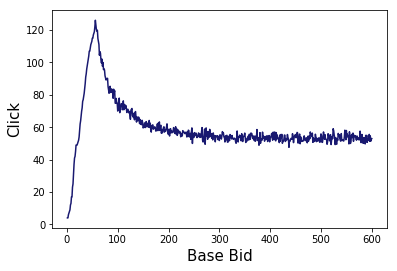

In [64]:
plt.plot(range(1,601),click_total, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
plt.savefig('click_constant.jpg')

### Logistic regression

In [65]:
click_total_2=[]
for base_bid in range(1,601):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_lr(base_bid))]
    click_total_individual_2=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_2.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_2)
    click_total_2.append(click_total_individual_mean)
    print(click_total_2[-1])

3.0
4.0
4.0
4.0
5.0
5.0
9.0
12.0
13.0
16.0
19.0
22.0
23.0
24.0
27.0
29.0
32.0
36.0
37.0
41.0
43.0
45.0
46.0
49.0
50.0
51.0
52.0
53.0
53.0
57.0
57.0
57.0
58.0
59.0
62.0
62.0
65.0
67.0
67.0
68.0
69.0
70.0
70.0
73.0
74.0
75.0
75.0
75.0
75.0
75.9
80.0
83.0
83.0
85.0
87.0
88.0
89.0
90.0
90.0
90.0
90.0
92.0
92.0
95.0
96.0
96.0
97.0
99.0
101.0
104.0
106.0
106.0
107.0
108.0
109.0
110.0
112.0
111.3
110.8
110.0
106.7
111.1
108.9
105.6
103.6
104.1
103.7
105.4
102.4
103.4
100.1
102.2
100.8
101.1
98.2
98.3
98.4
96.4
95.8
95.7
95.4
91.1
94.0
92.6
91.5
94.2
91.7
88.9
89.0
87.0
91.9
85.9
85.8
86.9
85.7
85.2
82.3
83.4
86.4
82.2
84.9
85.3
81.9
79.6
81.8
83.8
82.8
76.6
81.2
82.9
78.6
76.5
80.5
77.8
77.3
76.0
74.8
73.9
77.4
78.7
75.1
74.3
78.6
81.0
78.6
74.4
73.7
75.5
72.5
75.7
76.7
75.5
76.0
74.3
71.6
75.6
73.6
76.1
72.1
74.6
74.5
72.7
73.8
75.2
69.6
73.8
71.5
74.0
69.1
68.8
70.6
73.9
73.0
69.6
64.1
69.3
67.8
69.7
69.2
74.1
68.0
68.9
71.6
70.9
65.7
67.1
63.8
66.9
64.2
71.4
66.2
65.6
68.3
63.2
69.2
67.1
6

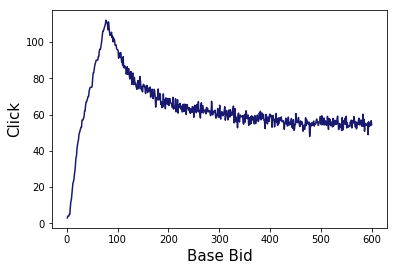

In [66]:
plt.plot(range(1,601),click_total_2, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
plt.savefig('click_xgb.jpg')

### Random Forest

In [67]:
# click_total_3=[]
# for base_bid in range(1,601):
#     data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_rf(base_bid))]
#     click_total_individual_3=[]
#     for interation in range(10):
#         data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
#         data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
#         data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
#         for i in range(len(data_filtered_payprice_random_array)):
#             if data_filtered_payprice_random_cumsum[i] > 6250000:
#                 break
#         data_finally_filtered=data_filtered_payprice_random.head(i)
#         click_for_one=sum(np.array(data_finally_filtered['click']))
#         click_total_individual_3.append(click_for_one)
#         click_total_individual_mean=np.mean(click_total_individual_3)
#     click_total_3.append(click_total_individual_mean)
#     print(click_total_3[-1])

4.0
5.0
5.0
7.0
7.0
7.0
8.0
8.0
8.0
8.0
9.0
9.0
10.0
10.0
11.0
11.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
11.9
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
11.9
12.0
12.0
11.9
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
12.0
13.0
13.0
13.0
12.9
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
12.9
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
12.9
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13.0
13

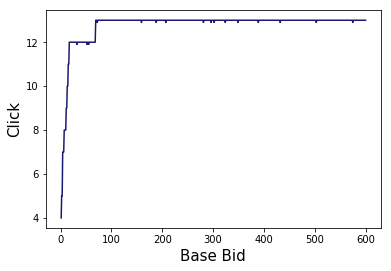

In [68]:
# plt.plot(range(1,601),click_total_3, color='midnightblue')
# plt.xlabel('Base Bid',fontsize=15)
# plt.ylabel('Click',fontsize=15)
# plt.title('',fontsize=15)
# plt.savefig('click_rf.jpg')

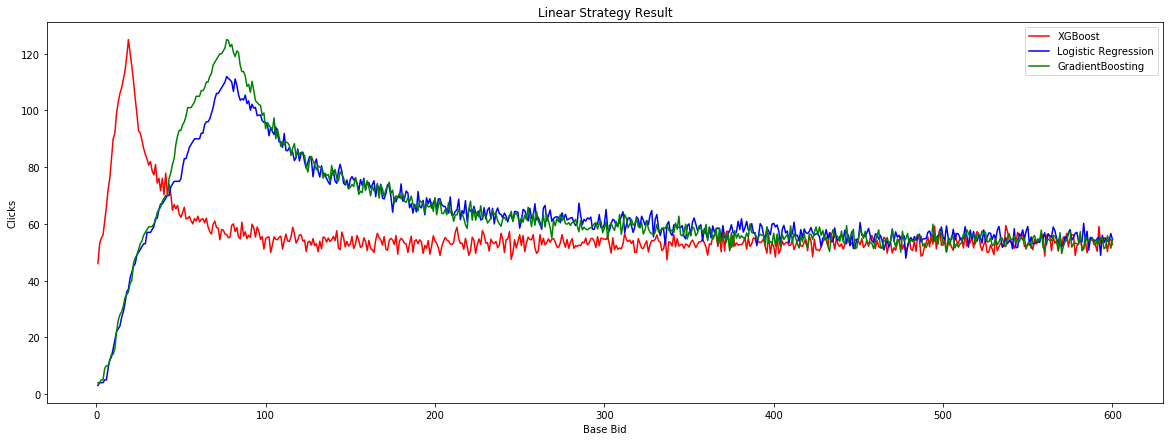

In [134]:
plt.figure(figsize = (20,7))

# plt.plot(basebids, results.loc[results["pCTR_model"] == "Logistic Regression", "Clicks"].values, "r")
# plt.plot(basebids, results.loc[results["pCTR_model"] == "Random Forest", "Clicks"].values, "b")
# plt.plot(basebids, results.loc[results["pCTR_model"] == "XGBoost", "Clicks"].values, "g")

plt.plot(range(1,601),click_total, label='XGBoost', color='r')
plt.plot(range(1,601),click_total_2, label='Logistic Regression', color='b')
plt.plot(range(1,601),click_total_gb, label='GradientBoosting', color='g')
plt.xlabel('Base Bid')
plt.ylabel('Clicks')
plt.title('Linear Strategy Result')
plt.legend()

### XGBoost

In [85]:
click_total_4=[]
for base_bid in range(1,301):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_(base_bid))]
    click_total_individual_4=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_4.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_4)
    click_total_4.append(click_total_individual_mean)
    print(click_total_4[-1])

17.0
27.0
38.0
44.0
48.0
48.0
53.0
55.0
58.0
58.0
61.0
65.0
68.0
72.0
73.0
76.0
81.0
83.0
84.0
86.0
88.0
91.0
94.0
96.0
96.0
96.0
99.0
100.0
101.0
102.0
105.0
107.0
107.9
108.0
109.0
112.0
114.0
117.0
117.0
120.0
122.0
122.0
123.0
125.0
126.3
123.3
120.3
117.3
116.6
115.2
115.5
112.9
112.9
110.1
107.0
110.0
105.4
104.2
102.3
100.3
101.2
98.7
100.1
101.7
95.4
95.8
96.8
99.6
93.6
94.6
94.0
93.9
93.8
90.9
89.9
88.6
87.4
88.3
85.0
86.3
85.7
83.1
84.7
81.7
80.1
79.2
82.1
82.3
83.7
83.0
82.5
80.8
80.8
78.5
80.0
76.9
79.7
79.1
80.7
76.7
76.1
75.4
74.5
77.3
72.5
73.4
74.2
73.7
70.4
75.1
73.8
74.5
71.8
73.3
69.6
70.0
67.6
69.0
68.2
70.0
67.9
67.5
68.4
69.6
67.7
66.0
68.2
62.6
69.0
64.5
66.2
65.8
66.1
66.9
65.5
64.7
63.4
64.1
62.1
68.2
62.2
64.8
59.5
62.7
64.7
62.9
61.9
60.4
64.3
59.8
62.3
60.9
61.7
61.9
63.7
63.7
61.7
65.0
61.7
61.1
61.1
61.1
58.7
59.0
62.8
60.9
61.0
59.7
64.1
62.8
61.1
59.4
57.4
58.9
59.0
57.5
63.0
60.1
62.0
58.2
58.2
59.4
59.5
59.1
60.1
59.0
62.4
58.4
58.2
62.0
59.2
56.9
58.2

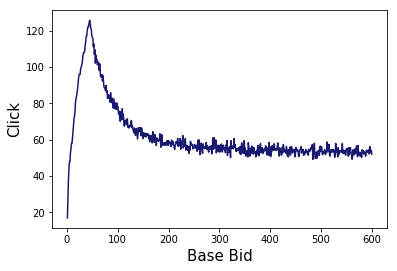

In [75]:
plt.plot(range(1,601),click_total, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
plt.savefig('XGBoost non linear.jpg')

In [86]:
click_total_5=[]
for base_bid in range(1,301):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_2(base_bid))]
    click_total_individual_5=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_5.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_5)
    click_total_5.append(click_total_individual_mean)
    print(click_total_5[-1])

46.0
53.0
55.0
56.0
61.0
66.0
72.0
76.0
83.0
90.0
92.0
99.0
103.0
106.0
108.0
111.0
114.0
119.0
125.0
120.5
115.6
110.9
104.1
98.7
93.7
92.4
87.6
89.6
87.7
84.3
83.6
78.6
76.8
77.1
77.7
75.4
80.0
77.0
71.8
71.6
72.8
71.6
70.5
73.1
66.8
66.6
67.4
64.5
68.6
64.7
63.0
64.1
63.6
63.1
57.5
59.7
62.7
61.0
61.1
64.6
54.7
62.6
61.3
60.5
55.7
59.9
59.9
59.4
55.2
55.6
60.7
60.5
55.8
56.4
59.8
61.3
55.7
54.1
55.6
51.0
55.1
53.9
56.7
58.9
54.5
59.8
56.5
57.3
59.2
53.5
57.7
57.3
54.3
54.4
52.2
54.7
55.8
56.7
56.4
54.0
56.9
55.5
55.0
57.2
56.6
53.6
52.4
50.2
56.3
56.1
53.3
54.9
55.5
53.9
54.0
55.6
53.7
54.4
55.0
52.7
51.1
52.9
56.1
56.7
52.0
52.4
53.8
54.6
52.9
55.8
57.3
52.7
56.2
55.1
55.5
53.0
54.6
52.7
48.4
51.0
51.5
53.4
53.2
57.9
51.6
54.8
54.2
52.2
54.5
55.6
52.2
51.0
51.3
53.0
55.1
52.0
52.7
51.2
53.8
51.2
55.5
54.3
52.1
50.8
53.0
56.4
54.1
50.5
54.8
52.0
53.0
54.2
51.8
54.5
52.8
55.7
49.9
52.7
49.1
56.2
54.7
54.2
54.4
54.8
51.5
54.1
54.6
54.6
50.9
51.1
54.6
51.4
52.7
52.7
52.1
58.3
52.5
52.8

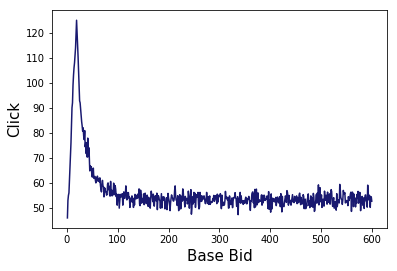

In [83]:
plt.plot(range(1,601),click_total, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
plt.savefig('XGBoost non linear2.jpg')

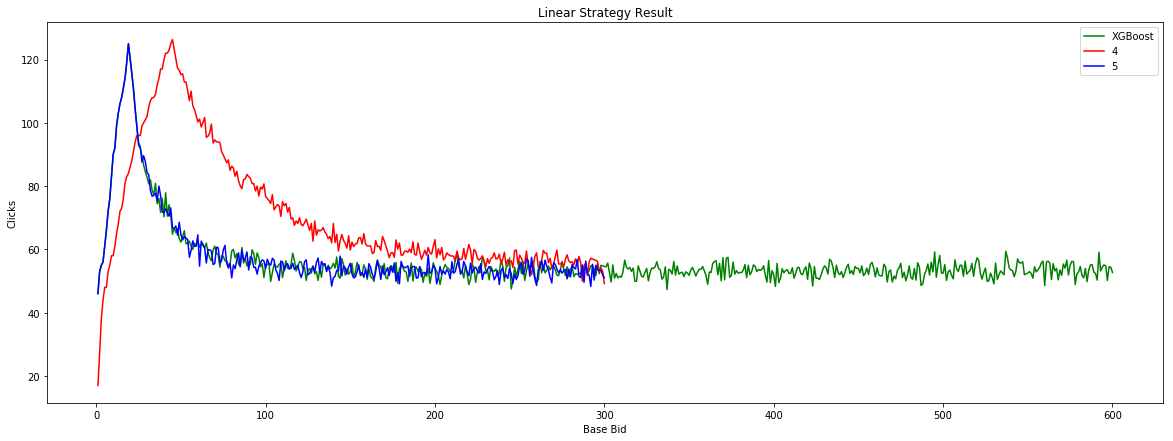

In [89]:
plt.figure(figsize = (20,7))

plt.plot(range(1,601),click_total, label='XGBoost', color='g')
plt.plot(range(1,301),click_total_4, label='4', color='r')
plt.plot(range(1,301),click_total_5, label='5', color='b')
plt.xlabel('Base Bid')
plt.ylabel('Clicks')
plt.title('Linear Strategy Result')
plt.legend()

In [91]:
click_total_6=[]
for base_bid in range(1,201):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_3(base_bid))]
    click_total_individual_6=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_6.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_6)
    click_total_6.append(click_total_individual_mean)
    print(click_total_6[-1])

0.0
0.0
0.0
0.0
0.0
0.0
1.0
3.9
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
5.0
5.0
5.0
5.0
5.0
5.0
6.0
6.0
8.0
8.0
9.0
9.0
10.0
10.0
10.0
10.0
13.0
13.0
13.0
13.0
13.0
13.0
14.0
14.0
15.0
15.0
16.0
16.0
16.0
17.0
17.0
17.0
18.0
18.0
18.0
18.0
19.0
20.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
24.0
25.0
26.0
27.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
30.0
30.0
31.0
31.0
32.0
32.0
32.0
32.0
33.0
34.0
35.0
35.0
35.0
35.0
37.0
39.0
45.0
45.0
46.0
46.0
48.0
48.0
48.0
48.0
48.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
50.0
50.0
52.0
52.0
53.0
53.0
53.0
54.0
54.0
54.0
54.0
55.0
56.0
56.0
57.0
57.0
57.0
57.0
57.0
57.0
58.0
64.0
68.8
69.5
68.6
69.1
68.1
67.2
66.8
69.2
66.9
66.6
65.7
67.7
66.3
70.0
76.5
74.5
73.8
73.0
77.4
75.2
73.4
74.1
72.4
73.9
71.5
71.2
71.8
74.3
71.6
68.8
72.4
70.5
71.1
72.2
71.3
75.2
72.2
70.9
73.6
74.7
72.9
71.2
73.3
70.4
69.3
70.1
68.6
71.2
71.1
70.4
69.6
72.3
69.6
70.3
70.2
71.2
71.3
71.4
71.3
72.2
69.8


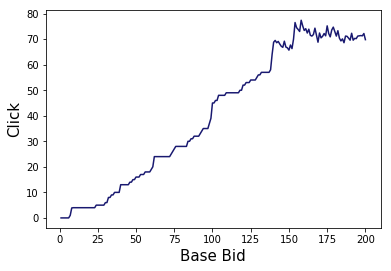

In [92]:
plt.plot(range(1,201),click_total_6, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
#plt.savefig('XGBoost non linear .jpg')

In [96]:
click_total_7=[]
for base_bid in range(1,201):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_4(base_bid))]
    click_total_individual_7=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_7.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_7)
    click_total_7.append(click_total_individual_mean)
    print(click_total_7[-1])

0.0
0.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
5.0
5.0
5.0
6.0
8.0
9.0
10.0
10.0
13.0
13.0
13.0
14.0
15.0
17.0
17.0
17.0
18.0
18.0
20.0
24.0
24.0
24.0
25.0
25.0
26.0
27.0
28.0
28.0
29.0
30.0
31.0
32.0
32.0
32.0
35.0
35.0
37.0
39.0
45.0
46.0
48.0
47.9
49.0
49.0
49.0
49.0
50.0
51.0
54.0
54.0
54.0
55.0
55.0
57.0
57.0
57.0
57.0
64.0
69.0
67.7
67.4
67.2
68.2
67.5
74.0
74.9
73.0
75.6
71.3
73.9
74.8
72.4
71.0
73.7
69.3
72.6
75.8
73.8
73.7
69.8
70.8
73.9
74.0
69.2
72.0
71.9
71.8
73.3
67.2
69.7
68.1
68.7
67.6
71.9
64.8
68.2
68.1
66.3
65.0
66.8
65.1
69.0
65.5
62.9
64.0
67.0
63.0
63.9
62.1
66.7
63.9
65.4
64.3
68.2
61.0
61.2
60.8
61.9
65.2
64.5
62.7
63.9
65.5
66.6
61.6
62.3
64.5
64.6
61.5
59.7
64.4
63.7
60.3
61.7
59.4
64.2
64.9
62.4
63.7
58.2
60.4
61.4
59.8
61.7
58.8
63.1
60.6
58.9
60.3
62.9
62.6
58.1
61.8
62.5
59.6
59.1
63.1
59.2
58.7
58.5
61.3
59.4
61.7
60.4
56.9
58.4
56.0
55.3
60.2
60.7
58.6
57.4
56.1
56.7
57.1
57.2
61.4
54.4
54.5
59.1
55.3
58.9
57.8
57.7
57.0
57.5
54.9
54.6
55.6


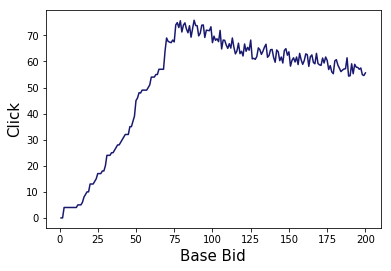

In [97]:
plt.plot(range(1,201),click_total_7, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
#plt.savefig('XGBoost non linear .jpg')

In [114]:
click_total_8=[]
for base_bid in range(1,201):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_chy(base_bid))]
    click_total_individual_8=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one=sum(np.array(data_finally_filtered['click']))
        click_total_individual_8.append(click_for_one)
        click_total_individual_mean=np.mean(click_total_individual_8)
    click_total_8.append(click_total_individual_mean)
    print(click_total_8[-1])

4.0
4.0
4.0
4.0
5.0
6.0
7.0
7.0
8.0
9.0
9.0
11.0
14.0
17.0
19.0
21.0
27.0
28.0
30.0
32.0
36.0
38.0
42.0
45.0
48.0
49.0
51.0
52.0
54.0
54.0
57.0
57.0
58.0
60.0
60.0
61.0
63.0
63.0
64.0
66.0
70.0
71.0
74.0
78.0
80.0
85.0
88.0
91.0
96.0
100.0
103.0
105.0
109.0
111.0
111.0
112.0
112.0
114.0
112.9
110.3
106.5
106.0
102.9
106.3
107.0
104.7
100.0
100.2
101.1
99.8
95.4
98.4
94.7
93.9
94.8
90.9
92.7
90.8
89.3
88.2
88.2
88.5
90.5
87.4
87.8
90.3
87.5
89.9
85.1
83.9
81.0
82.7
80.3
82.1
81.9
78.5
78.0
78.2
76.9
79.6
82.0
77.5
72.7
72.6
78.2
75.3
73.6
75.4
72.8
74.8
71.7
71.7
72.6
71.7
73.2
69.3
71.5
71.4
66.1
67.5
70.7
68.5
67.8
69.8
70.4
64.7
70.9
68.2
66.1
66.6
68.9
66.9
68.5
69.2
68.4
67.3
67.2
64.9
67.0
68.2
66.4
65.9
64.8
67.1
67.7
70.4
63.3
66.3
66.5
63.4
63.6
64.1
64.9
64.7
65.1
61.9
61.0
62.7
66.7
62.7
62.8
60.3
62.3
63.9
61.5
60.8
57.8
60.9
60.2
56.3
55.9
61.8
62.1
61.0
58.0
58.9
62.6
59.0
59.2
56.8
61.1
61.2
60.3
60.9
56.9
61.4
58.6
58.8
57.7
60.3
56.7
54.0
59.6
59.1
57.7
56.2
59.3
55.4
5

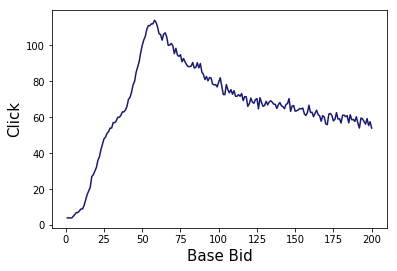

In [115]:
plt.plot(range(1,201),click_total_8, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
#plt.savefig('XGBoost non linear .jpg')

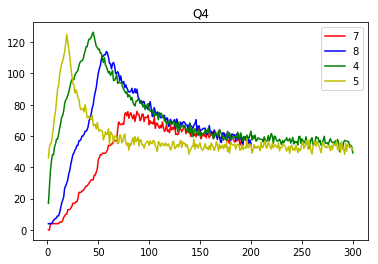

In [135]:
plt.plot(range(1,201),click_total_7, label='7', color='r')
plt.plot(range(1,201),click_total_8, label='8', color='b')
plt.plot(range(1,301),click_total_4, label='4', color='g')
plt.plot(range(1,301),click_total_5, label='5', color='y')

plt.title('Q4')

plt.legend()

In [ ]:
click_total.index(max(click_total))

### CTR

In [119]:
ctr_total=[]
for base_bid in range(1,201):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_4(base_bid))]
    ctr_total_individual=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        data_finally_filtered_click1=data_finally_filtered[(data_finally_filtered.click==1)]
        data_finally_filtered_ctr=len(data_finally_filtered_click1)/len(data_finally_filtered)
        ctr_total_individual.append(data_finally_filtered_ctr)
        ctr_total_individual_mean=np.mean(ctr_total_individual)
    ctr_total.append(ctr_total_individual_mean)
    print(ctr_total[-1])

0.0
0.0
0.0033585222502099076
0.0015455950540958269
0.0004646840148698884
0.0004098780612767701
0.0003553028957186001
0.000318775900541919
0.00028752156411730875
0.00024031240612796637
0.00021352693108418302
0.00024348672997321648
0.0002265518803806072
0.00021090817058252838
0.00023723854335534379
0.0002913752913752914
0.0003016490146132189
0.00031170126550713803
0.00029578797917652626
0.00027423267587807195
0.00025391120920330475
0.0002331462185476784
0.0002447039082709921
0.0002542459066409031
0.0002803014064535277
0.0002757591487152867
0.00026962300360026004
0.0002797898467373395
0.0002745827867101932
0.00029052454206069056
0.00032439007907008184
0.000317254689420878
0.0003085665796680338
0.00031454849708728095
0.00031150707121051647
0.0003169572107765452
0.0003244685325610182
0.00033028605131229724
0.0003265953600130638
0.00032920876376433194
0.0003355554561317167
0.00033892745859071774
0.00034578146611341634
0.0003391231546931465
0.00033311819449938576
0.0003600748955782802
0.0003

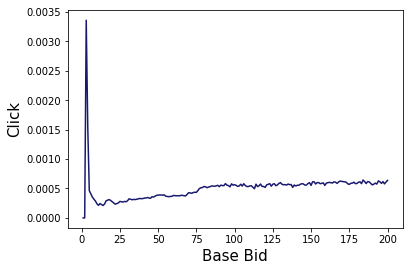

In [120]:
plt.plot(range(1,201),ctr_total, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
#plt.savefig('XGBoost non linear .jpg')

### Spend

In [121]:
spend_total=[]
for base_bid in range(1,201):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_4(base_bid))]
    spend_total_individual=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
        spend_total_individual.append(data_finally_filtered_spendsum)
        spend_total_individual_mean=np.mean(spend_total_individual)/1000
    spend_total.append(spend_total_individual_mean)
    print(spend_total[-1])

0.31210000000000004
1.8073
2.928
8.8321
39.4862
46.5319
57.209199999999996
67.7207
80.199
107.747
130.88060000000002
152.67929999999998
172.87079999999997
196.0291
220.0126
254.8784
295.5543
336.1963
369.3151
641.5115999999999
721.4849
822.0429
855.7373
898.8218
940.2801999999999
966.5395
1004.6168
1040.9029
1076.6976000000002
1175.6614
1335.3808000000001
1388.7957
1459.2731999999999
1517.252
1544.6152
1608.6508000000001
1652.5764
1712.0678
1749.6451000000002
1844.0772
1898.1083
1984.8848
2031.5046
2111.5978
2188.3746
2241.0173999999997
2325.2735
2378.4238
2478.3539
3162.177
3281.6443
3544.9605
3600.8199
3655.6468999999997
4083.6215
4163.2971
4237.9383
4316.2482
4439.7052
4569.176
4662.9011
4724.9427000000005
4815.1
4925.9946
4984.1453
5092.1285
5216.0203
5297.0572999999995
5795.0364
6249.972900000001
6249.9726
6249.9728
6249.9791
6249.968900000001
6249.9752
6249.973400000001
6249.968400000001
6249.9737000000005
6249.9757
6249.98
6249.9719000000005
6249.9799
6249.968599999999
6249.9668

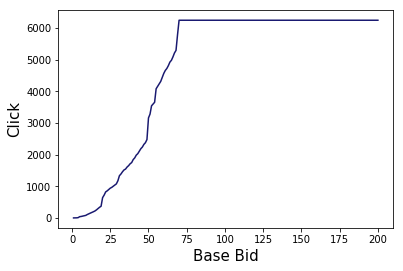

In [123]:
plt.plot(range(1,201),spend_total, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
#plt.savefig('XGBoost non linear .jpg')

### CPC

In [122]:
cpc_total=[]
for base_bid in range(1,201):
    data_filtered_payprice=csv_data[(csv_data.payprice<output_bidprice_xgb_4(base_bid))]
    cpc_total_individual=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        data_finally_filtered_spendsum=sum(data_finally_filtered['payprice'])
        spend_total_individual.append(data_finally_filtered_spendsum)
        spend_total_individual_mean=np.mean(spend_total_individual)
        click_for_one=sum(np.array(data_finally_filtered['click']))
    if click_for_one > 0:
        num_click=sum(np.array(data_finally_filtered['click']))
    else:
        num_click=np.NaN
    cpc_total.append(spend_total_individual_mean/num_click/1000)
    print(cpc_total[-1])

nan
nan
390.93790625
313.19192
262.63855
226.78063571428572
200.22086562500002
179.85525
163.87467999999998
151.42572272727273
141.53359375
106.86602769230768
101.70231714285715
97.53585066666666
78.49166770833334
57.28000661764706
49.91132777777778
44.325399473684215
43.955684999999995
34.55181978021978
35.50395384615385
36.709611705685624
35.21402916666667
33.94862106666667
30.929894117647056
31.890091938997823
32.861702731092436
31.95990996168582
32.88846185185186
30.541028225806453
26.394291666666668
27.347991540404042
28.331962745098036
28.155581485714283
29.089721
28.887108212058216
28.69588976608187
28.529355036630037
29.378306428571427
29.2243669470143
29.084032460317463
28.9803223555889
28.87945511363636
29.704076805555555
30.545000407608697
28.694992340425532
29.481274523809525
28.630426144511862
27.88990743589743
25.075162047930284
25.43024410535117
25.304279205974844
26.22488649691358
26.57905443413729
27.592627696793002
28.599165950590763
29.59726442646024
29.9768385084745

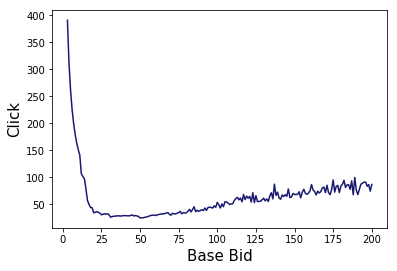

In [124]:
plt.plot(range(1,201),cpc_total, color='midnightblue')
plt.xlabel('Base Bid',fontsize=15)
plt.ylabel('Click',fontsize=15)
plt.title('',fontsize=15)
#plt.savefig('XGBoost non linear .jpg')

# Q5 multiagent formal

In [50]:
csv_data=pd.read_csv("/Volumes/Macbook/we_data/validation.csv")
csv_data.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,4,20,bbcb813b6166538503d8b33a5602d7d72f6019dc,663169f66491c98c69f1f94a5c48fa34aa9fe06f,windows_ie,211.144.203.*,79,79,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,23,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10111"
1,0,1,21,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,a23f0cfab6592c137f796e68fa752fceba08bb1b,windows_chrome,58.247.250.*,79,79,1,...,90,0,1,0,c938195f9e404b4f38c7e71bf50263e5,238,75,a3becb967c015e9acb5e72f22b100ef8,3476,"10075,10057,10024,10052,10083,10063,10006,10110"
2,0,4,8,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,5105a013ea54a9706146033e6a138d5234a3803e,windows_ie,117.12.111.*,2,2,2,...,250,2,0,5,911b2d84826786018761e8c0b0a3a60c,238,65,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10024,10059,10063,13776,10083,10006,10111"
3,0,5,15,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,577e9a768ce17e73c61ba7022db927f9ee761830,windows_chrome,61.187.224.*,201,205,2,...,280,2,0,5,dc0998c10f8f0b623b5d949e8272e4c7,238,6,d29e59bf0f7f8243858b8183f14d4412,3358,"13866,10057,10006,10063,10110"
4,0,1,18,0899bf144249458ea9c89188473694bf44c7ca15,e4bf79c562745d671b19f2edf7fda89c2e25987f,windows_chrome,117.41.145.*,134,135,2,...,200,1,0,5,23485fcd23122d755d38f8c89d46ca56,249,5,7e0e909ea89f707bc20f9585c9072081,3476,"10006,10063,13776,10110"


In [46]:
bid_price_linear_lr=base_bid*pCTR/avgCTR
bid_price_sqr=base_bid*(pCTR2/avgCTR)**2
bid_price_exp=base_bid*np.exp(pCTR2/avgCTR)
bid_price_linear=base_bid*pCTR2/avgCTR
bid_price_com=0.5*(base_bid*pCTR/avgCTR)+0.5*(base_bid*(pCTR2/avgCTR)**2)
bid_price_ortb=np.sqrt(base_bid*(pCTR2/avgCTR)+base_bid**2)

In [126]:
pCTR

array([0.00048742, 0.00041479, 0.00031849, ..., 0.00038419, 0.00035792,
       0.0003345 ])

In [99]:
def bid_price_com(base_bid):
    return 0.5*(base_bid*pCTR/avgCTR)+0.5*(base_bid*(pCTR2/avgCTR)**2)

In [127]:
def bid_price_linear_lr(base_bid):
    return base_bid*pCTR/avgCTR

In [79]:
def bid_price_sqr(base_bid):
    return base_bid*(pCTR2/avgCTR)**2

In [80]:
def bid_price_exp(base_bid):
    return base_bid*np.exp(pCTR2/avgCTR)

In [81]:
def bid_price_linear(base_bid):
    return base_bid*pCTR2/avgCTR

In [83]:
def bid_price_ortb(base_bid):
    return np.sqrt(base_bid*(pCTR2/avgCTR)+base_bid**2)

In [124]:
def output_index_for_our_win_startegy(bid_price_com,bid_price_ortb,bid_price_sqr, bid_price_exp, bid_price_linear, csv_data):
    index_for_our_win_impression=[]
    for i in range(len(bid_price_sqr)):
        if bid_price_com[i]==max(bid_price_com[i],bid_price_ortb[i],bid_price_sqr[i], bid_price_exp[i], bid_price_linear[i],csv_data.payprice[i]):
            index_for_our_win_impression.append(i)
    return index_for_our_win_impression

In [128]:
def output_index_for_our_win_startegy(bid_price_com,bid_price_ortb,bid_price_linear_lr,csv_data):
    index_for_our_win_impression=[]
    for i in range(len(bid_price_com)):
        if bid_price_com[i]==max(bid_price_com[i],bid_price_ortb[i],bid_price_linear_lr[i],csv_data.payprice[i]):
            index_for_our_win_impression.append(i)
    return index_for_our_win_impression

In [55]:
output_index_for_our_win_startegy(0.5*(130*pCTR/avgCTR)+0.5*(130*(pCTR2/avgCTR)**2),bid_price_sqr, bid_price_exp, bid_price_linear, csv_data)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,


In [138]:
#optimize the basebid in multiagent enviroment

click_total_28=[]
bid_price_list_28=[]
interval_list_28=[]
for base_bid in range(1,201):
#     bid_price=output_bidprice_com(base_bid)
#     bid_price_list_28.append(bid_price)
    #data_filtered_payprice=pd.DataFrame()
    #for index in output_index_for_our_win_startegy(bid_price_com(base_bid), bid_price_sqr, bid_price_exp, bid_price_linear, csv_data):
        #data_filtered_payprice=data_filtered_payprice.append(pd.DataFrame(csv_data.iloc[index]).T)
    index=output_index_for_our_win_startegy(bid_price_com(base_bid),bid_price_ortb(base_bid),bid_price_linear_lr(base_bid),csv_data)
    data_filtered_payprice=(pd.DataFrame(csv_data.iloc[index]))
    click_total_individual_28=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one_28=sum(np.array(data_finally_filtered['click']))
        click_total_individual_28.append(click_for_one_28)
        click_total_individual_mean_28=np.mean(click_total_individual_28)
    click_total_28.append(click_total_individual_mean_28)
    print(click_total_28[-1])

12.0
20.0
25.0
32.0
38.0
42.0
44.0
47.0
48.0
49.0
50.0
54.0
56.0
58.0
59.0
59.0
59.0
61.0
63.0
64.0
66.0
69.0
70.0
72.0
74.0
77.0
78.0
81.0
82.0
82.0
84.0
86.0
88.0
90.0
91.0
93.0
93.0
94.0
96.0
96.0
96.0
96.0
97.0
99.0
100.0
101.0
104.0
106.0
108.0
109.0
110.0
110.0
110.0
112.0
112.0
113.0
114.0
114.0
115.0
115.0
115.0
116.0
116.0
118.0
118.0
118.0
118.0
120.0
120.0
120.0
120.0
121.0
121.0
121.0
121.0
122.0
122.0
122.0
122.0
122.0
123.0
122.9
122.6
120.8
119.9
119.9
118.4
119.5
116.6
117.4
115.9
114.0
113.2
113.5
111.4
111.0
111.3
111.7
110.9
111.5
108.8
111.4
110.5
111.2
111.1
108.4
108.3
110.1
108.7
108.0
106.6
106.5
108.5
107.8
107.9
106.7
107.6
109.5
106.4
109.3
107.8
105.0
106.8
106.1
105.0
105.0
108.4
107.0
103.6
100.9
102.6
103.9
103.9
104.0
104.3
102.1
101.0
101.7
101.0
101.0
100.7
103.7
99.5
99.7
100.3
99.7
99.8
96.7
98.1
97.0
96.4
97.0
97.4
101.0
98.3
96.7
94.1
92.1
96.7
95.8
92.7
92.3
92.0
94.2
95.1
94.0
89.7
94.2
93.6
93.2
93.9
94.5
91.9
91.4
91.7
92.9
89.1
89.4
92.1
91.3


In [143]:
print(click_total_29.index(max(click_total_29))) #the optimal base bid

71


In [140]:
def output_index_for_our_win_startegy(bid_price_com,bid_price_ortb,csv_data):
    index_for_our_win_impression=[]
    for i in range(len(bid_price_com)):
        if bid_price_com[i]==max(bid_price_com[i],bid_price_ortb[i],csv_data.payprice[i]):
            index_for_our_win_impression.append(i)
    return index_for_our_win_impression

In [141]:
#optimize the basebid in multiagent enviroment

click_total_29=[]
bid_price_list_29=[]
interval_list_29=[]
for base_bid in range(1,201):
#     bid_price=output_bidprice_com(base_bid)
#     bid_price_list_28.append(bid_price)
    #data_filtered_payprice=pd.DataFrame()
    #for index in output_index_for_our_win_startegy(bid_price_com(base_bid), bid_price_sqr, bid_price_exp, bid_price_linear, csv_data):
        #data_filtered_payprice=data_filtered_payprice.append(pd.DataFrame(csv_data.iloc[index]).T)
    index=output_index_for_our_win_startegy(bid_price_com(base_bid),bid_price_ortb(base_bid),csv_data)
    data_filtered_payprice=(pd.DataFrame(csv_data.iloc[index]))
    click_total_individual_29=[]
    for interation in range(10):
        data_filtered_payprice_random=data_filtered_payprice.sample(frac=1)
        data_filtered_payprice_random_array=np.array(data_filtered_payprice_random['payprice'])
        data_filtered_payprice_random_cumsum=np.cumsum(data_filtered_payprice_random_array)
        for i in range(len(data_filtered_payprice_random_array)):
            if data_filtered_payprice_random_cumsum[i] > 6250000:
                break
        data_finally_filtered=data_filtered_payprice_random.head(i)
        click_for_one_29=sum(np.array(data_finally_filtered['click']))
        click_total_individual_29.append(click_for_one_29)
        click_total_individual_mean_29=np.mean(click_total_individual_29)
    click_total_29.append(click_total_individual_mean_29)
    print(click_total_29[-1])

12.0
20.0
25.0
32.0
38.0
42.0
44.0
47.0
48.0
49.0
50.0
54.0
56.0
58.0
59.0
59.0
59.0
61.0
63.0
64.0
66.0
70.0
71.0
73.0
75.0
78.0
79.0
82.0
83.0
83.0
85.0
87.0
89.0
91.0
92.0
94.0
94.0
95.0
97.0
97.0
97.0
98.0
99.0
102.0
103.0
105.0
108.0
110.0
112.0
113.0
114.0
114.0
114.0
116.0
116.0
117.0
118.0
118.0
119.0
119.0
119.0
120.0
120.0
122.0
122.0
122.0
122.0
124.0
124.0
124.0
124.0
125.0
124.9
123.9
122.4
122.2
120.2
119.4
117.6
118.4
118.3
117.3
116.3
115.9
115.1
115.9
115.8
112.9
111.8
110.4
113.4
110.3
111.0
107.2
107.7
108.6
107.0
104.4
107.4
105.4
106.8
110.4
105.4
107.6
104.7
103.1
103.8
105.8
106.1
104.1
101.2
104.7
101.0
103.6
102.2
103.6
104.3
103.4
101.0
101.6
102.8
101.8
102.8
98.6
99.7
99.8
98.1
100.1
99.6
101.7
97.4
97.4
97.6
98.0
98.6
99.3
97.4
96.1
92.4
96.5
94.2
93.3
95.5
96.2
97.7
96.5
93.5
93.5
90.2
94.4
89.3
94.1
91.3
94.2
87.9
92.6
89.5
90.0
91.2
88.1
89.2
87.7
88.9
89.6
84.6
88.9
86.4
85.8
88.3
86.9
87.2
87.8
87.9
88.3
84.6
83.3
87.7
86.4
86.8
89.2
82.8
86.1
86.1
85.

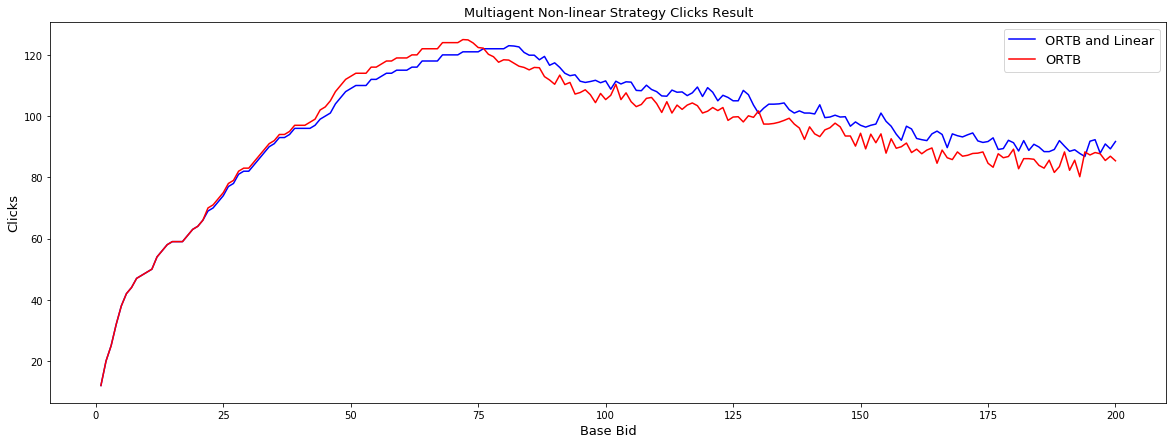

In [147]:
plt.figure(figsize = (20,7))

plt.plot(range(1,201),click_total_28, label='ORTB and Linear', color='b')
plt.plot(range(1,201),click_total_29, label='ORTB', color='r')

plt.xlabel('Base Bid',fontsize=13)
plt.ylabel('Clicks',fontsize=13)
plt.title('Multiagent Non-linear Strategy Clicks Result',fontsize=13)
plt.legend(fontsize=13)
plt.savefig('Multiagent Non-linear Strategy Clicks Result.jpg')

## click_total_28.index(max(click_total_28)) #the optimal base bid

In [145]:
click_total_29[71]

125.0

In [146]:
click_total_28[80]

123.0